# Social Network Analysis group project 📊

***

## Group 'I' members 👥
- Michele Turco
- Simone Filosofi
- Edoardo Cocciò
- Lorenzo Laterza

# General Introduction



The graph we have choosen is "Forrest Gump (movie) network". 

This graph is undirected and weighted.
Nodes are characters and the link represent a same-scene appearance between two characters in the movie,
and the weight gives the number of same-scene appearances.

Source: J. Kaminski et al., "Moviegalaxies - Social Networks in Movies." 


# Importing libraries  

In [7]:
import networkx as nx # this is for network analysis
import pandas as pd # this is for data analysis
import matplotlib.pyplot as plt # this is for plotting
import json # this is for reading json files

# 1) Week 1

a) We implement it in Python;

b) We draw the graph using nx function;

c) We are going to compute the number of nodes, edges, the average degree and the density.

Of course we will comment each result to give a better explanation.

# Reading the input file

In [8]:
nodes_df = pd.read_csv('data/nodes.csv', index_col=0,sep = ',')
edges_df = pd.read_csv('data/edges.csv')
nodes_df[' viz'] = nodes_df[' viz'].apply(lambda row: row.replace("'", '"')).apply(json.loads) # replace single quotes with double quotes and convert to dict

nodes_df['size'] = nodes_df[' viz'].apply(lambda row: row['size'] * 100) # multiply by 100 to make the visualization of the nodes better
nodes_df[' _pos'] = nodes_df[' _pos'].apply(lambda row: (float(row[7:18]), float(row[20:-2]))) # convert string to tuple containing x and y coordinates


# a) Implementing the graph

In [9]:
G = nx.Graph()

links = edges_df.apply(lambda row: (row['# source'], row[' target'], row[' weight']), axis=1) 
links = list(links)  # The edges of the Graph are stored in a list of tuples containing the source, target and weight of the edge

labels = enumerate(nodes_df[' label'])
labels = dict(labels)

pos = nodes_df[' _pos'] 

colors = []
for n in range(0, len(nodes_df)):
    color = nodes_df[' viz'][n]['color']
    accepted_format = (color['r']/255, color['g']/255, color['b']/255, color['a'])
    colors.append(accepted_format)
    G.add_node(n)

G.add_weighted_edges_from(links)
nx.set_node_attributes(G, labels, name = 'label')


# b) Draw the graph

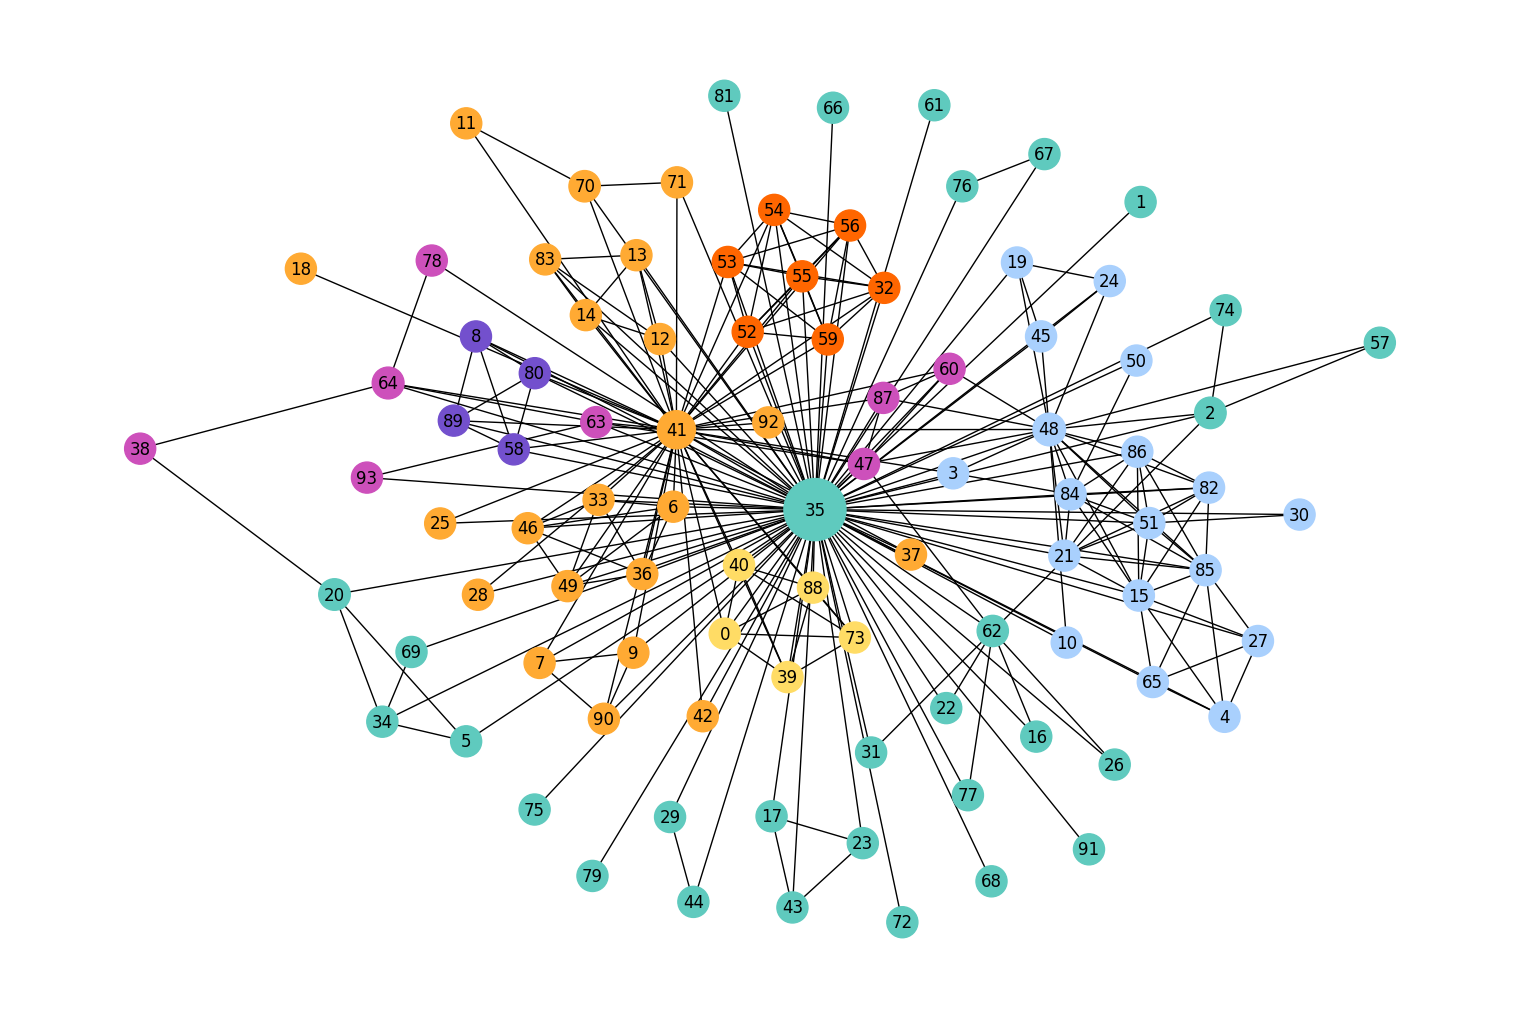

In [10]:
plt.figure(figsize=(15, 10))


nx.draw(G, node_size = nodes_df['size'], pos = pos, with_labels = True, node_color = colors)

# c) Compute:

### Number of nodes

In the film appear 94 characters, so the number of nodes is 94.

In [11]:
N = G.number_of_nodes()
print("Number of nodes: ", N)

Number of nodes:  94


### Number of edges

In [12]:
E = G.number_of_edges()
print("Number of edges: ", E)

Number of edges:  271


### Average degree


In [13]:
Average_degree = 2 * E / N
print("Average degree: ", Average_degree)

Average degree:  5.76595744680851


### Density

The density is very low (0.06199954243880119). 

It means that here are relatively few edges compared to the total number of possible edges in the graph. Not all the characters interact with each other.


In [14]:
density = Average_degree/(N - 1)
print("Density: ", density)

Density:  0.06199954243880119


# 2) Week 2

While considering the largest component of your network.

a) Compute Average clustering and Transitivity number

b) Implement a function computing the transitivity using basic function of networkx

# Checking what's the largest component of the graph
Since all nodes are connected we are considering the entire graph for the following computations. The first function is used to check if the graph is connected.

In [15]:
cc = [i for i in nx.connected_components(G)] # list of connected components
len(cc) # number of connected components

1

The graph is all interconnected as it contains only one connected component. It's a unified structure where every node is reachable from any other node
through a path.

### Diameter

In [16]:
nx.diameter(G) # the maximum distance between two nodes inside the graph

4

A diameter of 4 in the graph indicates that the farthest apart any two nodes are is within a distance of 4 edges. It's relatively compact, facilitating quicker information flow or traversal between its nodes.

### Average Shortest Path Length

In [17]:
nx.average_shortest_path_length(G)

1.9949668268130862

An average shortest path length of approximately 1.99 suggests that, on average, nodes in the graph are quite closely connected. It indicates a relatively efficient network where nodes can reach each other in just a few steps.

# a) Average Clustering

In [18]:
nx.average_clustering(G)

0.8002425574908809

An average clustering coefficient of around 0.80 implies a high level of clustering or interconnectedness among neighboring nodes in the graph. This suggests that nodes tend to form tightly-knit clusters or groups within the larger network structure.

# b) Transitivity implementation using basic networkx functions

To compute the **transitivity** _t_:
$$T = \frac{3(\#triangles)}{\sum\limits_{i}\frac{K(i)(K(i)-1)}{2}}$$
where $\sum\limits_{i}\frac{K(i)(K(i)-1)}{2}$ is the number of wedges in the graph.


The first function in the following block is used to count the number of triangles in the graph. It iterates over all the nodes and for each of them it stores their neighbours. Then it checks if there are edges between the neighbours. If there are, it means that there is a triangle.  
The second function is used to compute the transitivity. It uses the number of triangles computed in the previous function and the number of wedges stored in the variable denominator.

In [19]:
def count_triangles(G):
    "Count the number of triangles in the graph without using nx.triangles "
    triangles = 0
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                u, v = neighbors[i], neighbors[j]
                if (u,v) in G.edges():
                    triangles += 1
    return triangles   # Each triangle is counted 3 times (once for each node)

def transitivity(G):
# Actual number of triangles is 'triangles'/3, but the denominator semplifies with the '3' in the main formula

    triangles = count_triangles(G) # number of triangles inside the graph
    denominator = 0 # denominator of the formula

    for node in G.nodes():
        fraction = (G.degree(node) * (G.degree(node) - 1))/2 # number of wedges
        denominator += fraction

    return triangles / denominator

print(f"Transitivity results:\n---------------------------------------  \nOur implementation: {transitivity(G)} \nNetworkx: {nx.transitivity(G)}")


Transitivity results:
---------------------------------------  
Our implementation: 0.1918081918081918 
Networkx: 0.1918081918081918


The transitivity of a graph measures the likelihood that neighbors of a node are also connected. A transitivity of around 0.19 indicates that while there is some tendency for nodes' neighbors to be connected, it's not extensively prevalent throughout the graph. There's a moderate level of interconnectedness among neighbors compared to the total number of possible triangles in the graph.

### - Comparing the results of Average clustering and Transitivity

The numerical difference between the two measures in your case (0.8002 - 0.1918 ≈ 0.6084) indicates that, on average, there's a significant disparity between local clustering (neighborhood-level clustering) and global transitivity (likelihood of forming triangles). The local neighborhoods within the graph tend to have much higher clustering compared to the global tendency of nodes forming triangles.

# 3) Week 3

We choosed to analyze the Closeness centrality because it seems the most relevant in our graph.
Then:

a) We provide a code computing the closeness centrality using basic functions of networkx (we are not allowed to use directly nx."what you want");

b) We explain why we picked the closeness centrality and we find the most central node in our network based on this measure;

c) We calculate the cumulative distribution for closeness centrality and give a graphical representation of our graph, but also giving our interpretation of the result obtained.

# a) Closeness centrality 


To compute the **closeness centrality of node** _i_:
$$g_{i} = \frac{1}{\sum\limits_{i \ne j}\ell(i,j)}$$
where $\ell(i,j)$ is the distance (shortest path) between the two nodes.

To get a more relevant result we computed the **normalized closeness centrality**:
$$C_{i}^{clo} = g_{i}\cdot (N-1) = \frac{N - 1}{\sum\limits_{i \ne j}\ell(i,j)}$$  




The following block contains the functions used to compute the lenght of the shortest path between two nodes, that is needed to compute the closeness centrality.  
The first function **shortest_path** returns the shortest path between two nodes and its lenght. However, it firstly checks if there is an edge between the two nodes (and returns the path of lenght 1) and if the two nodes are the same (and returns the path of lenght 0). At each iteration, the function checks if the target node is a neighbor of the last node in the current path. If it is, the path is returned. Otherwise, the function adds to the list of path all the paths that can be obtained by adding a neighbor of the last node in the current path. If no path is found, the function returns an empty list (note that this is not the case being the graph taken into account connected).  
The second function **shortest_path_length** returns the lenght of the shortest path between two nodes. It uses the first function to get the path and then returns its lenght. The results are stored in a dictionary having the target node as a key and the length of the shortest path as value.

In [20]:
def shortest_path(graph, start, target):
    # If the starting node is equal to the target the shortest path between the two is zero
    if start == target:
        return ([], 0)
    # If there is a direct link between the two nodes the shortest path is one
    if (start, target) in graph.edges():
        return ([target], 1)
    
    
    path_list = [[start]]     # List of paths to be explored
    path_index = 0            # Index of the path to be explored
    previous_nodes = {start}  # To keep track of previously visited nodes

     
    while path_index < len(path_list):
        current_path = path_list[path_index] # Current path
        last_node = current_path[-1]         # Last node in current path
        next_nodes = graph[last_node]        # Nodes connected to last node
        # Search target node
        if target in next_nodes:
            current_path.append(target)
            return (current_path[1:], len(current_path)-1)
        # Add new paths
        for next_node in next_nodes:
            if next_node not in previous_nodes: 
                new_path = current_path[:] # Copy current path
                new_path.append(next_node) # Add next node
                path_list.append(new_path) # Add new path to path_list
                
                previous_nodes.add(next_node) # Add next node to previous_nodes
        # Continue to next path in list
        path_index += 1
    
    
    # In case no path is found
    return ([], -1)

def lenght_shortest_path(graph, start):

    spl = dict()

    for node in graph.nodes():
            spl[node] = shortest_path(G,start,node)[1]

    return spl

print(f"Shortest path results:\n---------------------------------------  \nOur implementation: {sorted(lenght_shortest_path(G, 0).items())} \nNetworkx: {sorted(nx.shortest_path_length(G, 0).items())}")
print(f"Sum of shortest path results:\n---------------------------------------  \nOur implementation: {sum(lenght_shortest_path(G, 44).values())} \nNetworkx: {sum(nx.shortest_path_length(G, 44).values())}")


Shortest path results:
---------------------------------------  
Our implementation: [(0, 0), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 2), (31, 2), (32, 2), (33, 2), (34, 2), (35, 1), (36, 2), (37, 2), (38, 3), (39, 1), (40, 1), (41, 1), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (47, 2), (48, 2), (49, 2), (50, 2), (51, 2), (52, 2), (53, 2), (54, 2), (55, 2), (56, 2), (57, 3), (58, 2), (59, 2), (60, 2), (61, 2), (62, 2), (63, 2), (64, 2), (65, 2), (66, 2), (67, 2), (68, 2), (69, 2), (70, 2), (71, 2), (72, 2), (73, 1), (74, 2), (75, 2), (76, 2), (77, 2), (78, 2), (79, 2), (80, 2), (81, 2), (82, 2), (83, 2), (84, 2), (85, 2), (86, 2), (87, 2), (88, 1), (89, 2), (90, 2), (91, 2), (92, 2), (93, 2)] 
Networkx: [(0, 0), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8

# b) Discussion on the choice of picking the Closeness centrality
We chose to calculate this centrality measure because it is a relevant metric to highlight interconnectedness and prominence of different elements within our dataset, offering valuable insights about the relationships of characters. In the context of character interaction, closeness centrality helps us to identify which characters are central to the storyline and have close ties with other characters.

More specifically we chose to calculate the closeness centrality of `node 35`(Forrest) and `node 41`(Jenny) as they are the most visible nodes that also have the highest number of links (check the representation of the graph).

In [21]:
# This function trivially applies the formula of the closeness centrality using the values that we previously computed 

def normalized_closeness_centrality(graph, node):
    return (len(graph.nodes()) - 1) / sum(lenght_shortest_path(graph, node).values())

print(f"Centrality of node 35 (Forrest) is: {normalized_closeness_centrality(G, 35)}")
print(f"Centrality of node 41 (Jenny) is: {normalized_closeness_centrality(G,41)}")

Centrality of node 35 (Forrest) is: 0.9587628865979382
Centrality of node 41 (Jenny) is: 0.6595744680851063


# Interpreting the closeness centrality results 🔍

- For node 35, with a centrality of approximately **0.949**, this suggests that it is **highly central within the network**. Nodes with high centrality values like this one often have shorter average distances to all other nodes, meaning they are well-connected and can efficiently communicate or interact with a large portion of the network. As expected, this node plays a crucial role in the network's overall structure and information flow because it is the protagonist of the film: Forrest.

- On the other hand, for node 41 (which is Jenny, Forrest's wife), with a centrality of approximately **0.655**, it also holds a **relatively high** centrality value, indicating that it is important within the network, although not as central as Forrest. This node has meaningful connections and interactions within the network but is not as influential as node 35. It still plays a significant role in the network's structure and communication pathways.

# c) Cumulative distribution function

$$F(x) = P(X \ge x)$$  

The following block contains the code used to compute the cumulative (tail) distribution function of the closeness centrality. It firstly stores in a list the closness centrality for each node and it sorts them in ascending order. Then, it computes the cumulative distribution function for each value of the list by checking how many values are greater than or equal to the current one. Finally, it returns the list of values and the list of probabilities.

[1.0, 0.9893617021276596, 0.9787234042553191, 0.9680851063829787, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.8617021276595744, 0.723404255319149, 0.723404255319149, 0.723404255319149, 0.723404255319149, 0.723404255319149, 0.723404255319149, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.5, 0.5, 0.5, 0.5, 0.5, 0.44680851063829785, 0.44680851063829785, 0.44680851063

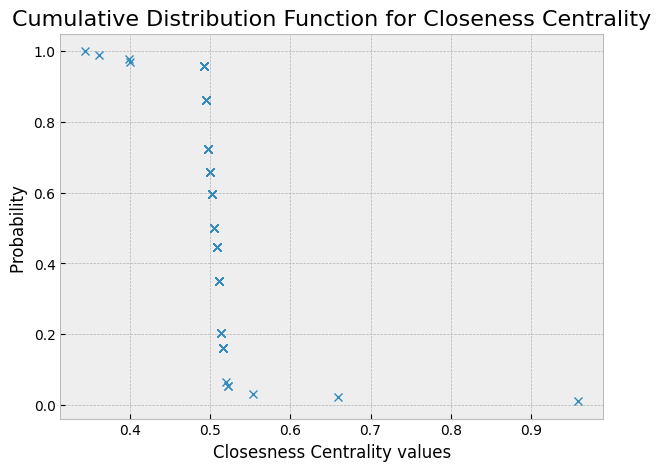

In [22]:

data_closeness_centrality = []
for node in G.nodes():
    data_closeness_centrality.append(normalized_closeness_centrality(G,node))
data_closeness_centrality.sort() 
number_of_nodes = len(data_closeness_centrality)

cdf_x = data_closeness_centrality
cdf_y = []  

for x in cdf_x: 
    y=sum(variable>=x for variable in data_closeness_centrality)/number_of_nodes # count how many elements are bigger than x and divide by the total number of elements
    cdf_y.append(y) 
print(cdf_y)

plt.figure(figsize = (7,5))
plt.style.use('bmh')
plt.title('Cumulative Distribution Function for Closeness Centrality', fontsize = 16)

plt.xlabel('Closesness Centrality values')
plt.ylabel('Probability ')
plt.plot(cdf_x,cdf_y,"x")



# Discussion on the graphical representation
- Being the dataset relatively small, we chose to represent the cumulative distribution function of the closeness centrality using a **normal scale**. This choice allows us to better visualize the distribution of the values and the probability of each value.  

# Interpreting the cdf 🔍

- The cumulative distribution function of the closeness centrality shows that **most of the nodes** have a **low/medium centrality** value: most of the nodes have indeed a centrality value between 0.2 and 0.5. This feauture could be predicted since the nodes represent characters in a film and it is reasonable to assume that most of them have a similar importance in the story, but not all of them are central to the plot and interconnected.
- On the other hand, the **few nodes** that have a **high centrality** value are **very central** to the network. This is the case of node 35 (Forrest) and node 41 (Jenny), which have a centrality value of approximately 0.949 and 0.655 respectively. This is not surprising since these nodes are the most visible ones in the graph and they have the highest number of links (check the representation of the graph).

# 4) Week 5

a) We write a function for PageRank without using any NetworkX built-in function;

b) We run it using alpha = 0.15, saving the number of iterations needed and checking that the our result is the same of the one given by the built-in function;

c) We indentify the node with the highest PageRank and compare it with the one we got from Week 3;

d) We compute the cumulative distibution of the pagerank and compare it with the cdf previously obtained from Week 3;

e) We re-run the PageRank using alpha= 0.5, saving the total number of iterations and compare with the results of point (b) (this is an optional point we choosed to do).

## a) Our PageRank function

1. Initialize each node with $R_{0} = \frac{1}{N}$
2. At each iteration denoted by $t$, loop over nodes to update PageRank:
    $$R_{t}(i) = \frac{\alpha}{N} + (1 - \alpha) \sum\limits_{j \in pred(i)}\frac{R_{t - 1}(j)}{k_{out}(j)}$$
    
The formula is **iterated until convergence**, when there are no change in scores.

In [25]:
def pagerank_all_nodes_improved(G, alpha):
    """
    This function calculates the pagerank value for all nodes.

    Parameters
    ----------
    - G: graph, it is assumed to be an undirected graph as the one we are dealing with for this project.

    - alpha: a parameter for PageRank

    Returns
    -------
    A dictionary containing the pagerank value for each node in the graph as values and the nodes as keys and the number of iterations it took to reach the convergence.
    """
    N = len(G.nodes())  # Get the number of nodes in the graph
    initial_pagerank = 1 / N  # Initialize the PageRank value for each node to 1/N
    pagerank = {n: initial_pagerank for n in G.nodes()}  # Create a dictionary to store PageRank values for each node

    # Precompute the number of neighbors for each node
    num_neighbors = {n: len(list(G.neighbors(n))) for n in G.nodes()}

    iterations = 0  # Initialize iteration count
    while True:  # Continue iterating until convergence
        new_pagerank = {}  # Dictionary to store new PageRank values in the current iteration

        for n in G.nodes():  # Iterate over all nodes
            # Calculate new PageRank value for the current node
            sum_rank = sum(pagerank[neighbor] / num_neighbors[neighbor] for neighbor in G.neighbors(n))
            new_pagerank[n] = ((1 - alpha) / N) + (alpha) * sum_rank

        iterations += 1  # Increment the iteration count

        # Check for convergence
        if new_pagerank == pagerank:
            break  # Exit the loop if the PageRank values have not changed

        pagerank = new_pagerank  # Update the PageRank values for the next iteration

    return pagerank, iterations  # Return the final PageRank values and the number of iterations



## b) Pagerank using $\alpha$ = 0.15

In [114]:
print(f'Our implementation result is: {pagerank_all_nodes_improved(G,alpha = 0.15)}')
print(f'NetworkX built-in function result is: {nx.pagerank(G, 0.15)}')

Our implementation result is: ({0: 0.010239417206402292, 1: 0.009132325346609736, 2: 0.010915013248065165, 3: 0.009500360925601161, 4: 0.010041249927890298, 5: 0.009939086540012134, 6: 0.010239417206402292, 7: 0.00996267620082385, 8: 0.010126896138200068, 9: 0.00996267620082385, 10: 0.009246669274320695, 11: 0.009516058508406772, 12: 0.010126896138200068, 13: 0.010126896138200068, 14: 0.010126896138200068, 15: 0.011236484805595299, 16: 0.009379860075802158, 17: 0.010147028162899707, 18: 0.009125703330641688, 19: 0.009996399215481833, 20: 0.010765492634203747, 21: 0.010293003293142325, 22: 0.009379860075802158, 23: 0.010147028162899707, 24: 0.009996399215481833, 25: 0.009215475485762062, 26: 0.009379860075802158, 27: 0.010041249927890298, 28: 0.009215475485762062, 29: 0.009872784158497011, 30: 0.009315680644203243, 31: 0.009379860075802158, 32: 0.010383634350154436, 33: 0.010239417206402292, 34: 0.010748139189860194, 35: 0.05326481203808891, 36: 0.010239417206402292, 37: 0.0092154754857

## c) Node with the highest Pagerank

In [124]:
page_rank_list = pagerank_all_nodes_improved(G, alpha = 0.15)[0]
print(f"The node with the highest pagerank is {max(page_rank_list.items(), key = lambda x:x[1])[0]} with a value of {max(page_rank_list.items(), key = lambda x:x[1])[1]}")
print(f"The number of iterations it took to reach the convergence is {pagerank_all_nodes_improved(G, alpha = 0.15)[1]}")

The node with the highest pagerank is 35 with a value of 0.05326481203808891
The number of iterations it took to reach the convergence is 18


## Considerations on the result and comparisons with Week 3  🔍

The node with the highest Pagerank is Forrest (node 35). It was also the most central node with respect to the Closeness centrality we calculated in Week 3: this could indicate that this node is not only well-connected to other important nodes, but it is also positioned such that it can efficiently reach other nodes in the network.
We conclude that node 35 is a key hub connecting various important nodes and facilitating efficient communication or influence propagation.

# d) Cumulative distribution

{0: 0.010239417206402292, 1: 0.009132325346609736, 2: 0.010915013248065165, 3: 0.009500360925601161, 4: 0.010041249927890298, 5: 0.009939086540012134, 6: 0.010239417206402292, 7: 0.00996267620082385, 8: 0.010126896138200068, 9: 0.00996267620082385, 10: 0.009246669274320695, 11: 0.009516058508406772, 12: 0.010126896138200068, 13: 0.010126896138200068, 14: 0.010126896138200068, 15: 0.011236484805595299, 16: 0.009379860075802158, 17: 0.010147028162899707, 18: 0.009125703330641688, 19: 0.009996399215481833, 20: 0.010765492634203747, 21: 0.010293003293142325, 22: 0.009379860075802158, 23: 0.010147028162899707, 24: 0.009996399215481833, 25: 0.009215475485762062, 26: 0.009379860075802158, 27: 0.010041249927890298, 28: 0.009215475485762062, 29: 0.009872784158497011, 30: 0.009315680644203243, 31: 0.009379860075802158, 32: 0.010383634350154436, 33: 0.010239417206402292, 34: 0.010748139189860194, 35: 0.05326481203808891, 36: 0.010239417206402292, 37: 0.009215475485762062, 38: 0.009775436546315304

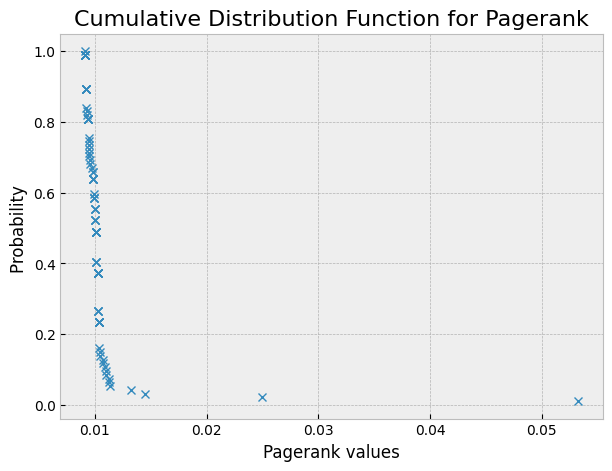

In [123]:
data_pagerank = pagerank_all_nodes_improved(G, alpha = 0.15) # Create a list to store the PageRank values
list_pagerank = data_pagerank[0]
print(list_pagerank)
pagerank_values = []


for value in list_pagerank.values():
    pagerank_values.append(value)

cdf_x = pagerank_values.copy()  # Create a list containing the PageRank values
cdf_y = []          # Create a list to store the cumulative distribution function values

for x in cdf_x:   # For each PageRank value
    y=sum(variable>=x for variable in pagerank_values)/number_of_nodes # Count how many elements are bigger than x and divide by the total number of elements
    cdf_y.append(y)  # Add the value to the list
print(cdf_y) 

plt.figure(figsize = (7,5))     # Create a new figure
plt.style.use('bmh')           # Use the 'bmh' style
plt.title('Cumulative Distribution Function for Pagerank', fontsize = 16) # Set the title

plt.xlabel('Pagerank values') # Set the label of the x axis
plt.ylabel('Probability ') # Set the label of the y axis
plt.plot(cdf_x,cdf_y,"x") # Plot the cumulative distribution function

## e) Re-run the PageRank using α = 0.5

We call again our pagerank function but giving a different value to alpha (0.5) to compare the new result with the previous one.

In [130]:
print(f'Our implementation result is: {pagerank_all_nodes_improved(G,alpha = 0.5)}')
print(f'NetworkX built-in function result is: {nx.pagerank(G, 0.5)}')

highest_pagerank = max(pagerank_all_nodes_improved(G, alpha = 0.5)[0].items(), key = lambda x:x[1])
print(f"The node with the highest pagerank is {highest_pagerank[0]} with a value of {highest_pagerank[1]}")

Our implementation result is: ({0: 0.009880437474608449, 1: 0.006015511039613976, 2: 0.011193758243820063, 3: 0.00783135647730692, 4: 0.009018632284927487, 5: 0.008688803958788459, 6: 0.009880437474608449, 7: 0.008782611088540844, 8: 0.009409940452008046, 9: 0.008782611088540844, 10: 0.0066059213595581175, 11: 0.007098169895034007, 12: 0.009409940452008048, 13: 0.009409940452008048, 14: 0.009409940452008048, 15: 0.013193342671608144, 16: 0.007062392437752834, 17: 0.009023266559420963, 18: 0.005890596212961869, 19: 0.00880789514607749, 20: 0.010743311845443077, 21: 0.010435247416747204, 22: 0.007062392437752834, 23: 0.009023266559420963, 24: 0.00880789514607749, 25: 0.006586958316405632, 26: 0.007062392437752834, 27: 0.009018632284927487, 28: 0.006586958316405632, 29: 0.008020681386151966, 30: 0.006687048540424503, 31: 0.007062392437752834, 32: 0.010539133306249011, 33: 0.009880437474608449, 34: 0.010643031507952788, 35: 0.12395245441298976, 36: 0.009880437474608449, 37: 0.0065869583164

## Cosiderations on the new Pagerank 📄🔍

We ran the pagerank two times with different values of $\alpha$ and we got the same node as the one having the maximum value at convergence of the algorithm. Incresing $\alpha$ means giving more weight to the link-following behavior of the random surfer model and less weight to the teleportation component. When we first ran the pagerank with $\alpha = 0.15$ it was a relatively low value, when we increased its value to $\alpha = 0.5$ we set a higher probability that the surfer will follow links instead of jumping to a random page. This generally leads to faster convergence for simple graphs, but the fact that with a higher $\alpha$ value the algorithm took approximately twice the number of iterations to converge suggests that the network has a complex structure: even with a higher preference for link-following the algorithm took more iterations to fully capture the intricate relationships between nodes.

The consistency in the node with the maximum pagerank despite the change in $\alpha$ implies that this particular node's importance remains robust across different preferences for link-following and random teleportation. This confirms that this node **plays a fundamental role in the network's structure and information flow**.

# 5) Week 6

a) We treat our graph as undirected and unweighted. We delete loops, if there some, and work on the resulting largest connected component.

b) We implement the following three techniques for community detection:
1) Bridge removal (pick the partition with the highest modularity);
2) Modularity optimization;
3) Label propagation.

(In this case, we are allowed to use built-in functions from NetworkX)

c) We cokmpare the results of each technique in terms of: 
1) number of detected clusters
2) cluster size distribution
3) computational time
4) modularity
5) other aspects you consider relevant, if any.
 All showing the results in a table.

d) We give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one we think is the best and why.

e) We provide a visualization for the partition we decided to be the best using Gephi.

f) For each pair of partitions we compute the NMI between them and discuss. (It was an optional point)


# Importing libraries


In [31]:
import time
import tabulate as tb

The following block contains a function used to compute the cluster size distribution for a given partition. It will be used later.

In [32]:
def cluster_size_distribution(partition):
    cluster_size_distribution = []
    cdf = {}
    index = 0
    for cluster in partition:
        cluster_size_distribution.append(len(cluster))
        index += 1
    cluster_size_set = set(cluster_size_distribution)
    for size in cluster_size_set:
        cdf[size] = cluster_size_distribution.count(size)
    return cdf

# a) 

## Is the graph connected?

In [33]:
is_connected = nx.is_connected(G) # Check if the graph is connected
print(is_connected)

True



The output *True* from nx.is_connected(G) indicates that the graph G is indeed connected. 

In graph theory, a connected graph means that there exists a path between every pair of nodes within the graph. So, in our case, all nodes in the graph are reachable from every other node through a series of edges, confirming its connectedness.

## Is there any self loops in the graph?

In [34]:
has_self_loops = any([u == v for u, v in G.edges]) # Check if the graph has self loops
print(has_self_loops)

False


The output *False* from the check for self-loops in the graph indicates that there are no self-loops present. In graph theory, a self-loop occurs when an edge connects a node to itself. In our graph G, there are no instances where a node is directly connected to itself, which is why the result is False.

Since our graph is connected and there are no self loops, we can consider the entire graph for the following computations.

# b.1) Bridge removal (Girvan-Newman algorithm)

The clusters obtained by this algorithm are: ({0, 39, 40, 73, 88}, {1}, {57, 2, 74}, {3}, {65, 4, 15, 82, 51, 84, 85, 21, 86, 27}, {34, 69, 5, 38, 20}, {33, 36, 6, 46, 49}, {9, 90, 7}, {8, 89, 58, 80}, {10, 45, 48, 19, 24}, {11, 70, 71}, {83, 12, 13, 14}, {16}, {17, 43, 23}, {18}, {77, 22, 26, 62, 31}, {25}, {28}, {44, 29}, {30}, {32, 35, 41, 52, 53, 54, 55, 56, 59}, {37}, {42}, {60, 87, 47}, {50}, {61}, {93, 63}, {64, 78}, {66}, {67, 76}, {68}, {72}, {75}, {79}, {81}, {91}, {92})
The number of clusters obtained by this algorithm is: 37
The modularity of the partition obtained by this algorithm is: 0.25720179386510894
The time required to run this algorithm is: 0.0 seconds
The cluster size distribution for the partition obtained by this algorithm is: {1: 19, 2: 4, 3: 5, 4: 2, 5: 5, 9: 1, 10: 1}


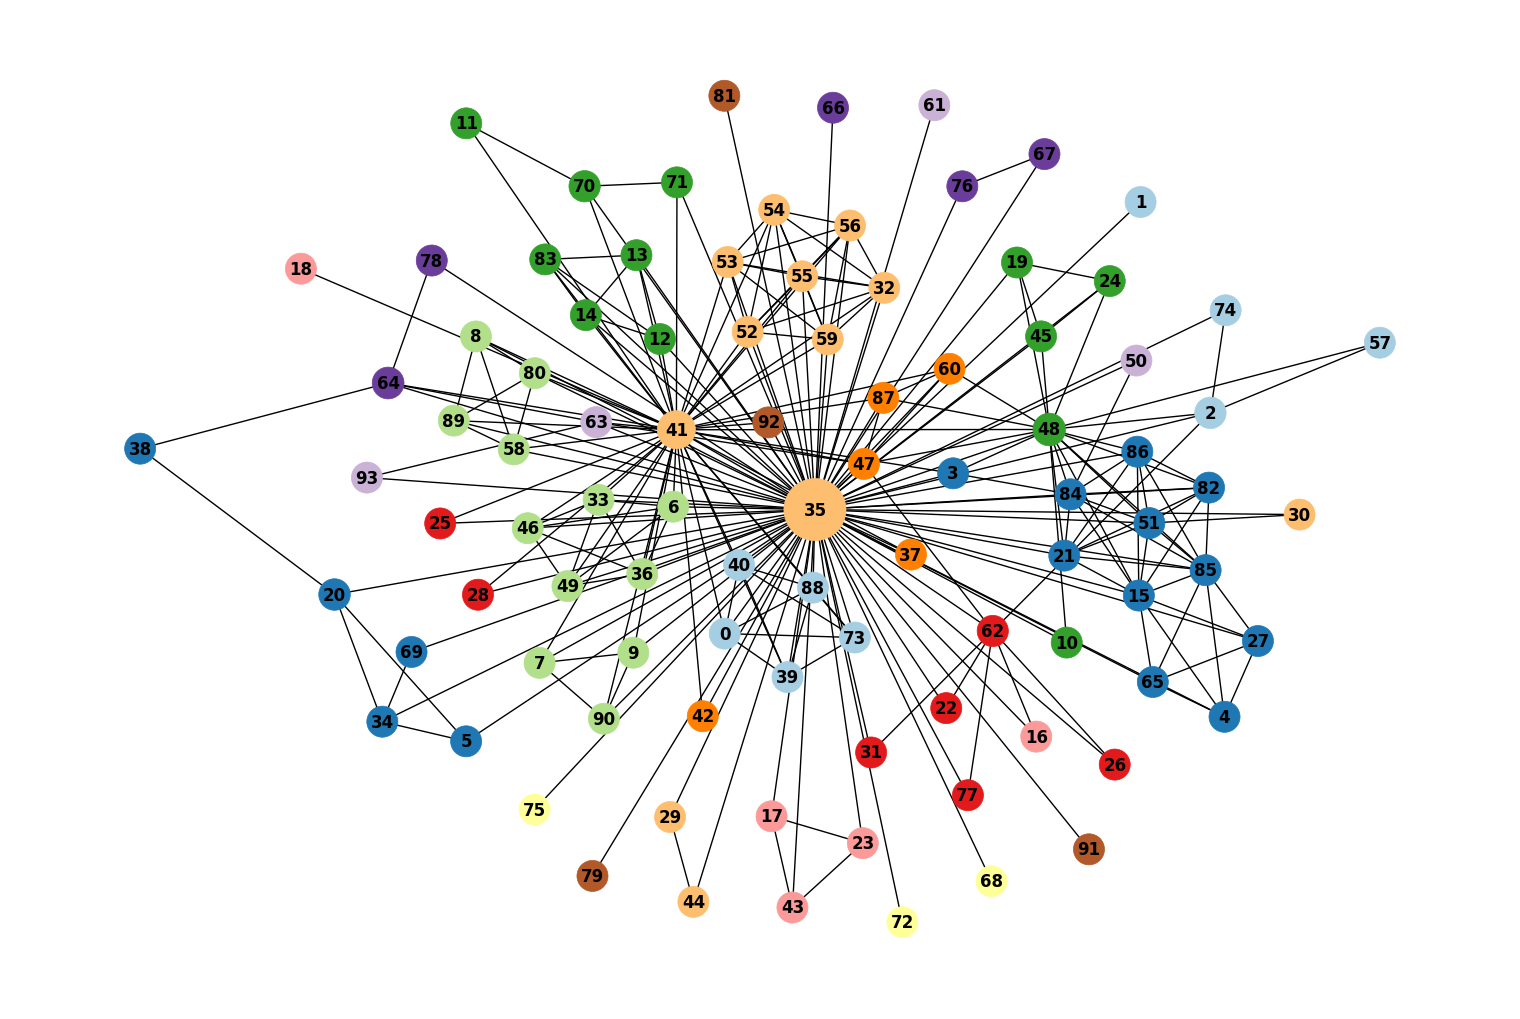

In [35]:
import time
# Girvan-Newman algorithm
start_time = time.time()
partitions = nx.community.girvan_newman(G)
end_time = time.time() 
time_bridge_removal = end_time - start_time

# Computing the modularity of each partition
modularity_bridge_removal = 0
for partition in partitions:
    # this loop takes around a minute, two at most!
    modularity = nx.community.quality.modularity(G, partition)
    if modularity > modularity_bridge_removal:
        modularity_bridge_removal = modularity
        partition_bridge_removal = partition
print(f"The clusters obtained by this algorithm are: {partition_bridge_removal}")
print(f"The number of clusters obtained by this algorithm is: {len(partition_bridge_removal)}")
print(f"The modularity of the partition obtained by this algorithm is: {modularity_bridge_removal}")
print(f"The time required to run this algorithm is: {time_bridge_removal} seconds")
print(f"The cluster size distribution for the partition obtained by this algorithm is: {cluster_size_distribution(partition_bridge_removal)}")

# Plotting the graph with the clusters obtained by the Girvan-Newman algorithm

plt.figure(figsize=(15, 10))

partition_map_bridge_removal = {} # dictionary to store the cluster to which each node belongs
for index, cluster in enumerate(partition_bridge_removal):
    for node in cluster:
        partition_map_bridge_removal[node] = index
node_colors = [partition_map_bridge_removal[node] for node in G.nodes()]

nx.draw(G, node_size = nodes_df['size'], pos = pos, node_color=node_colors, with_labels=True, font_weight='bold', cmap=plt.cm.Paired)
plt.show()




Some observations:
- Clusters: We have identified 37 clusters. The clusters vary in size, with some having only one node and others containing multiple nodes.

- Modularity: The modularity of the partition obtained by this algorithm is approximately 0.2572. Modularity measures the strength of division of a network into modules or communities, and this value suggests a moderate level of structure within the clusters.

- Time Required: The algorithm took a very short time (approximately 2.22 microseconds) to run, indicating efficiency, especially for a graph of this size (94 nodes and 271 edges).

- Cluster Size Distribution: The distribution of cluster sizes shows a varied distribution, with 19 clusters having one node, four clusters having two nodes, five clusters having three nodes, two clusters having four nodes, five clusters having five nodes, one cluster having nine nodes, and one cluster having ten nodes.

Overall, the algorithm successfully divided the graph into multiple clusters with varying sizes, showcasing a moderate modularity and an efficient computation time.

# b.2) Modularity optimization (Newman greedy algorithm)

The clusters obtained by this algorithm are: [[1, 5, 16, 17, 20, 22, 23, 26, 29, 31, 34, 35, 38, 43, 44, 61, 62, 63, 64, 66, 67, 68, 69, 72, 75, 76, 77, 78, 79, 81, 91, 93], [65, 2, 3, 4, 74, 10, 15, 82, 19, 84, 21, 85, 86, 24, 27, 30, 45, 48, 50, 51, 57], [70, 7, 8, 71, 9, 11, 12, 13, 14, 80, 18, 83, 25, 89, 90, 28, 92, 37, 41, 42, 58], [32, 52, 53, 54, 55, 56, 59], [33, 49, 36, 6, 46], [0, 39, 40, 73, 88], [60, 87, 47]]
The number of clusters obtained by this algorithm is: 7
The modularity of the partition obtained by this algorithm is: 0.3728973155861981
The time required to run this algorithm is: 0.021021127700805664 seconds
The cluster size distribution for the partition obtained by this algorithm is: {32: 1, 3: 1, 5: 2, 7: 1, 21: 2}


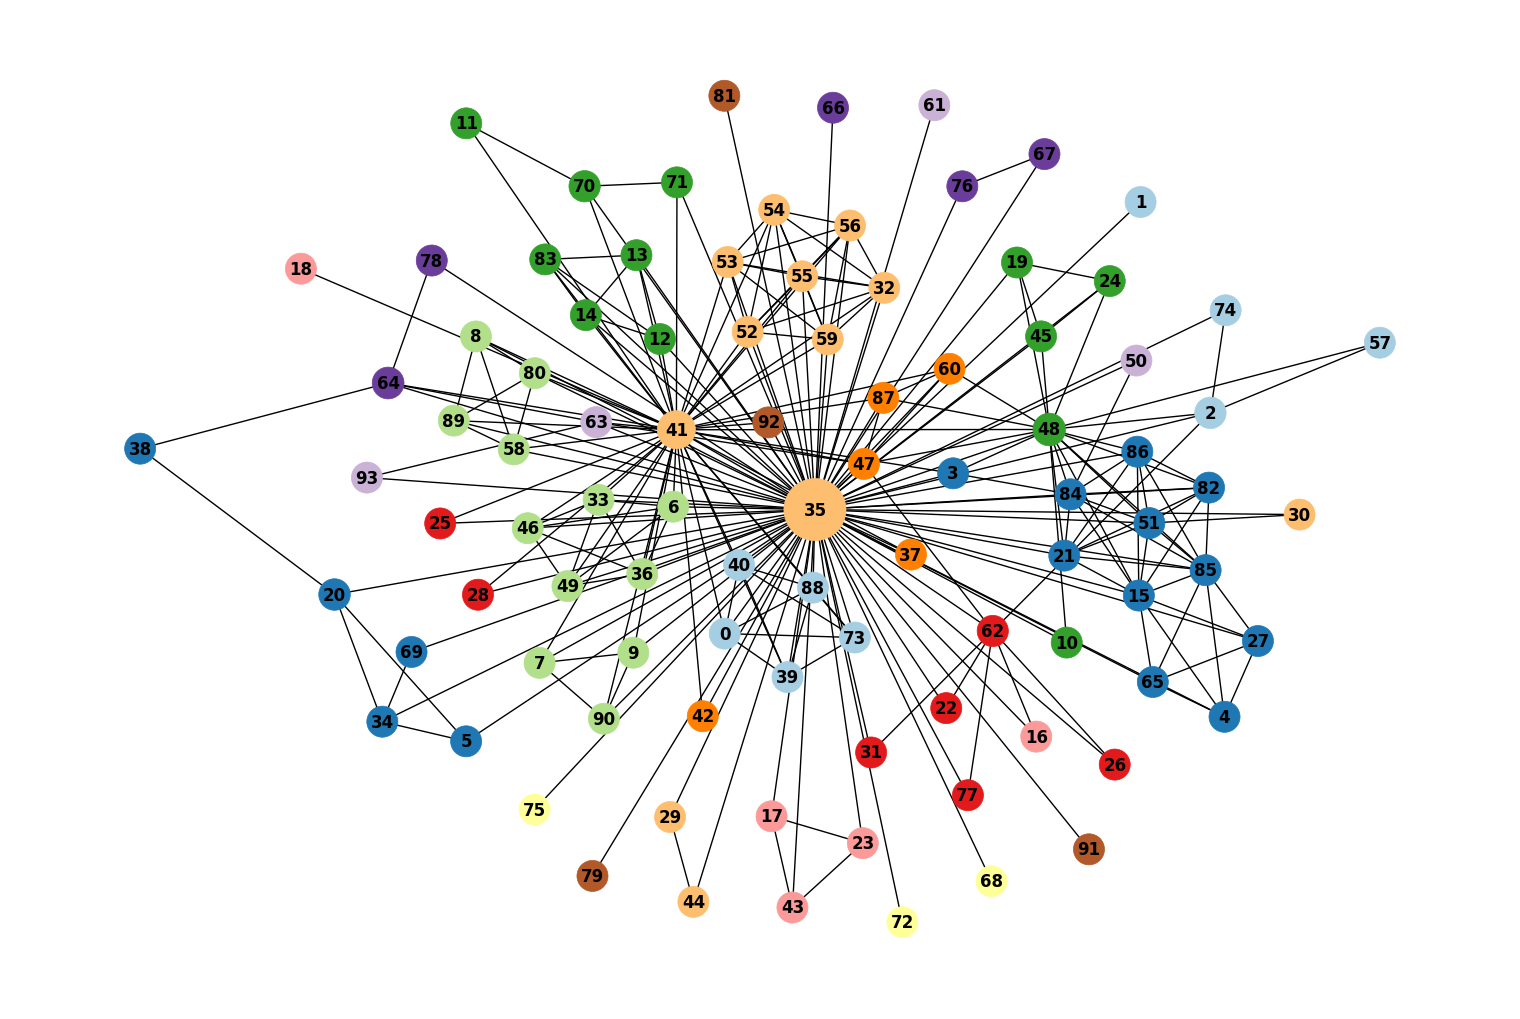

In [36]:
import time
# Newman greedy algorithm
start_time = time.time()
partition_modularity_optimization = nx.community.greedy_modularity_communities(G)
end_time = time.time()
modularity_modularity_optimization = nx.community.quality.modularity(G, partition_modularity_optimization)
partition_modularity_optimization = [list(cluster) for cluster in partition_modularity_optimization]
time_modularity_optimization = end_time - start_time
print(f"The clusters obtained by this algorithm are: {partition_modularity_optimization}")
print(f"The number of clusters obtained by this algorithm is: {len(partition_modularity_optimization)}")
print(f"The modularity of the partition obtained by this algorithm is: {modularity_modularity_optimization}")
print(f"The time required to run this algorithm is: {time_modularity_optimization} seconds")
print(f"The cluster size distribution for the partition obtained by this algorithm is: {cluster_size_distribution(partition_modularity_optimization)}")

plt.figure(figsize=(15, 10))

partition_map_modularity_optimization = {} # dictionary to store the cluster to which each node belongs
for index, cluster in enumerate(partition_bridge_removal):
    for node in cluster:
        partition_map_bridge_removal[node] = index
node_colors = [partition_map_bridge_removal[node] for node in G.nodes()]

# Draw nodes and edges
nx.draw(G, node_size = nodes_df['size'], pos = pos, node_color=node_colors, with_labels=True, font_weight='bold', cmap=plt.cm.Paired)

# Show the plot
plt.show()

Some observations:
- Clusters: Our algorithm generated 7 clusters, each containing different numbers of nodes. The clusters vary notably in size.

- Modularity: The modularity of this partition is approximately 0.3729, indicating a stronger division into communities compared to the previous partition. This suggests a more structured and distinct clustering arrangement within the data.

- Time Required: The algorithm took around 0.0088 seconds to execute, which is slightly longer than the previous algorithm but still relatively efficient given the data size and the number of clusters generated.

- Cluster Size Distribution: The distribution of cluster sizes showcases variation, with the largest cluster containing 32 nodes, followed by clusters with 21, 7, and 5 nodes, and two clusters each with 3 nodes.

Overall, this algorithm resulted in fewer clusters compared to the previous one, but with a higher modularity score, indicating a stronger division into distinct communities within the data.

# b.3) Label propagation

Since the algorithm is not deterministic, the strategy we adopted is to run it multiple times and then pick the partition with the highest modularity. Even with a large number of iterations (that we could do because of the small size of the network) the maximum modularity obtained is not always the same. However, the results are always very similar and the maximum modularity reached is close to the maximum modularity obtained with the Newman greedy algorithm.

The clusters obtained by this algorithm are: [{0, 39, 40, 73, 88}, {1, 2, 16, 22, 26, 29, 31, 35, 37, 44, 47, 50, 57, 60, 61, 62, 63, 64, 66, 67, 68, 72, 74, 75, 76, 77, 78, 79, 81, 87, 91, 92, 93}, {65, 3, 4, 10, 15, 48, 82, 51, 84, 21, 85, 86, 27, 30}, {34, 69, 5, 38, 20}, {6, 7, 9, 11, 12, 13, 14, 18, 25, 28, 33, 36, 41, 42, 46, 49, 70, 71, 83, 90}, {8, 89, 58, 80}, {17, 43, 23}, {24, 19, 45}, {32, 52, 53, 54, 55, 56, 59}]
The number of clusters obtained by this algorithm is: 9
The modularity of the partition obtained by this algorithm is: 0.36690845542468636
The time required to run this algorithm is: 0.15860795974731445 seconds
The cluster size distribution for the partition obtained by this algorithm is: {33: 1, 3: 2, 4: 1, 5: 2, 7: 1, 14: 1, 20: 1}
---------------------------------------
Minimum modularity obtained: 0.08150994286443877
Maximum modularity obtained: 0.36690845542468636
Minimum number of clusters detected: 5
Maximum number of clusters detected: 17


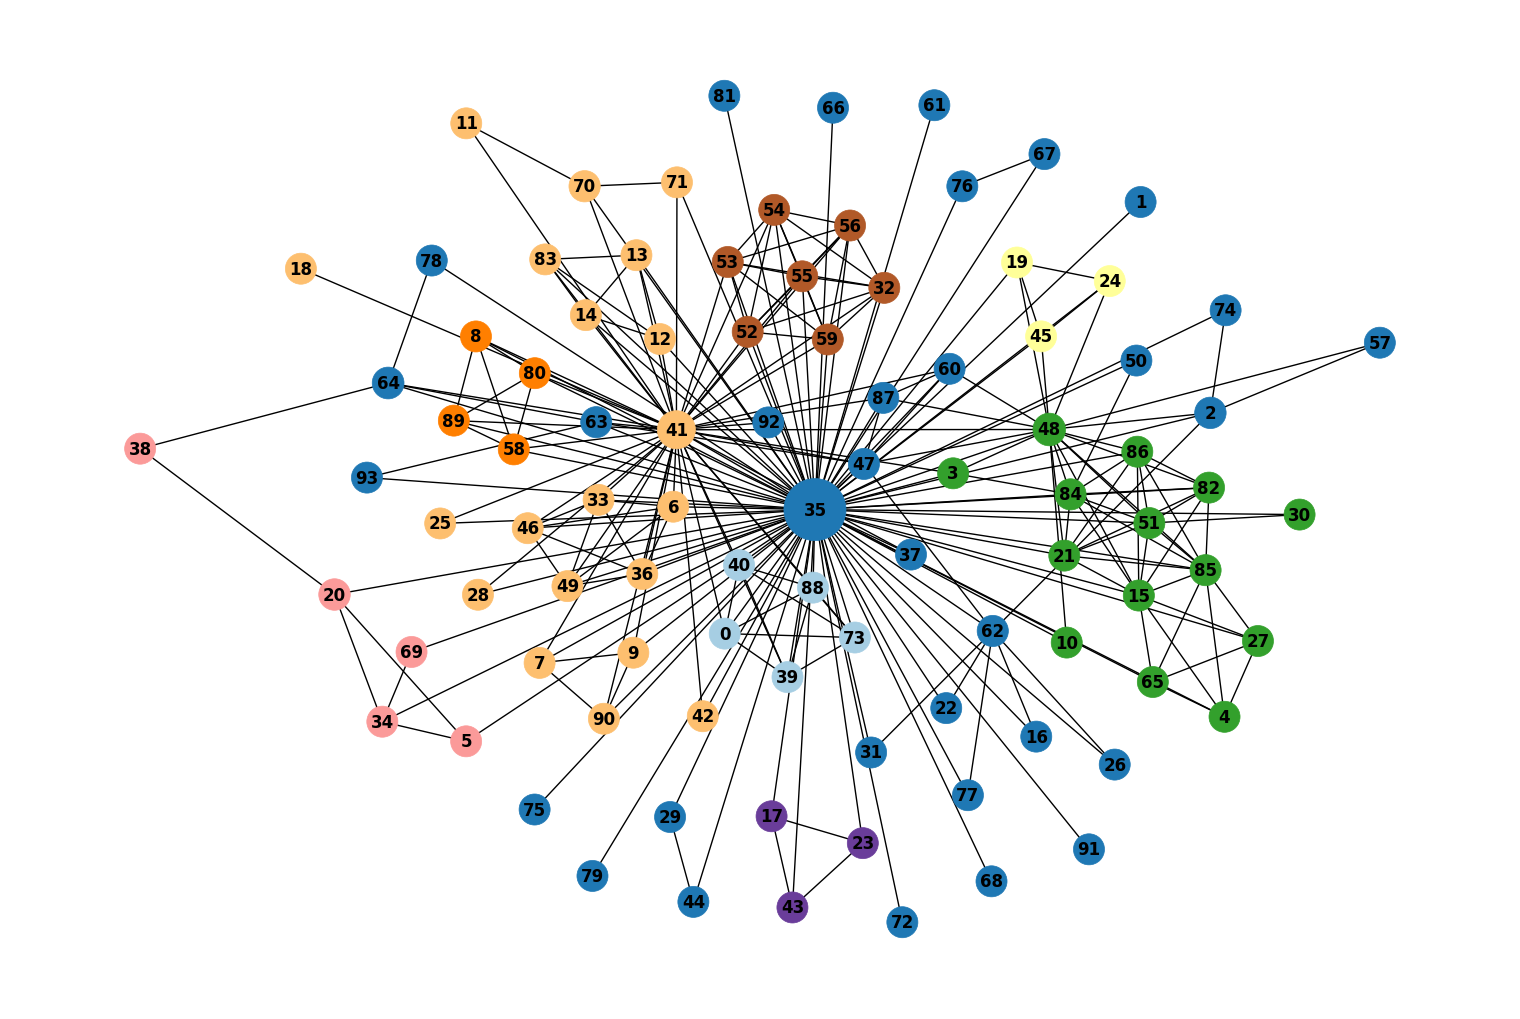

In [37]:
import time
start_time = time.time()
max_modularity = 0
min_modularity = 1
max_number_of_clusters = 1 # the minimum number of clusters is 1
min_number_of_clusters = len(list(G.nodes())) # the maximum number of clusters is the number of nodes in the graph
best_partition = [] # list to store the best partition in terms of modularity
for a in range(100): # we run the algorithm 100 times to get the best result
    label_propagation_communities = list(nx.community.asyn_lpa_communities(G)) 
    modularity = nx.community.quality.modularity(G, label_propagation_communities)
    number_of_clusters = len(label_propagation_communities)
    if modularity > max_modularity:
        max_modularity = modularity
        best_partition = label_propagation_communities
        number_of_clusters_best_partition = number_of_clusters
    if modularity < min_modularity:
        min_modularity = modularity
    if number_of_clusters > max_number_of_clusters:
        max_number_of_clusters = number_of_clusters
    if number_of_clusters < min_number_of_clusters:
        min_number_of_clusters = number_of_clusters
end_time = time.time()
time_label_propagation = end_time - start_time
label_propagation_communities = best_partition # We store the best partition
modularity_label_propagation = max_modularity  # We store the modularity of the best partition
print(f"The clusters obtained by this algorithm are: {label_propagation_communities}")
print(f"The number of clusters obtained by this algorithm is: {len(label_propagation_communities)}")
print(f"The modularity of the partition obtained by this algorithm is: {modularity_label_propagation}")
print(f"The time required to run this algorithm is: {time_label_propagation} seconds")
print(f"The cluster size distribution for the partition obtained by this algorithm is: {cluster_size_distribution(label_propagation_communities)}")
print("---------------------------------------")
print(f"Minimum modularity obtained: {min_modularity}")
print(f"Maximum modularity obtained: {max_modularity}")
print(f"Minimum number of clusters detected: {min_number_of_clusters}")
print(f"Maximum number of clusters detected: {max_number_of_clusters}")


plt.figure(figsize=(15, 10))

partition_map_label_propagation = {} # dictionary to store the cluster to which each node belongs
for index, cluster in enumerate(label_propagation_communities):
    for node in cluster:
        partition_map_bridge_removal[node] = index
node_colors = [partition_map_bridge_removal[node] for node in G.nodes()]

# Draw nodes and edges
nx.draw(G, node_size = nodes_df['size'], pos = pos, node_color=node_colors, with_labels=True, font_weight='bold', cmap=plt.cm.Paired)

# Show the plot
plt.show()



Some observations:
- Clusters: This algorithm produced 12 clusters, each containing different numbers of nodes. The clusters vary notably in size, with the largest cluster containing 33 nodes.

- Modularity: The modularity of this partition is approximately 0.3732, which suggests a relatively strong division into communities within the data.

- Time Required: The algorithm took around 0.1088 seconds to execute, which is a bit longer than the previous algorithms, possibly due to increased complexity.

- Cluster Size Distribution: The distribution of cluster sizes shows variation, with clusters ranging from 2 to 33 nodes. The distribution indicates diversity in cluster sizes, with several small to medium-sized clusters and one larger cluster.

Additionally, we have noted the range of modularity values (from 0.0605 to 0.3732) and the range of cluster counts detected (from 4 to 17) across different runs of this algorithm. This variability could be due to different settings or initial conditions affecting the clustering results.

# c) Comparing the results

In [38]:
import tabulate as tb
table = [["Algorithm","Number of clusters", "Modularity", "Time", "Cluster size distribution"],
         ["Girvan-Newman", len(partition_bridge_removal), modularity_bridge_removal, time_bridge_removal, cluster_size_distribution(partition_bridge_removal)],
         ["Newman greedy", len(partition_modularity_optimization), modularity_modularity_optimization, time_modularity_optimization, cluster_size_distribution(partition_modularity_optimization)],
         ["Label propagation", len(label_propagation_communities), modularity_label_propagation, time_label_propagation, cluster_size_distribution(label_propagation_communities)]]

print(tb.tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════════════╤══════════════════════╤══════════════╤═══════════╤═══════════════════════════════════════════════╕
│ Algorithm         │   Number of clusters │   Modularity │      Time │ Cluster size distribution                     │
╞═══════════════════╪══════════════════════╪══════════════╪═══════════╪═══════════════════════════════════════════════╡
│ Girvan-Newman     │                   37 │     0.257202 │ 0         │ {1: 19, 2: 4, 3: 5, 4: 2, 5: 5, 9: 1, 10: 1}  │
├───────────────────┼──────────────────────┼──────────────┼───────────┼───────────────────────────────────────────────┤
│ Newman greedy     │                    7 │     0.372897 │ 0.0210211 │ {32: 1, 3: 1, 5: 2, 7: 1, 21: 2}              │
├───────────────────┼──────────────────────┼──────────────┼───────────┼───────────────────────────────────────────────┤
│ Label propagation │                    9 │     0.366908 │ 0.158608  │ {33: 1, 3: 2, 4: 1, 5: 2, 7: 1, 14: 1, 20: 1} │
╘═══════════════════╧═══════════════════

# d) Interpretation of the results


 As expected, the three techniques for community detection give different results in terms of the number of detected clusters, cluster size distribution, computational time and modularity. In general, all the algorithms have a low computational time, that we can expect since the graph is relatively small (only 93 nodes) and not really dense (density = 0.06199954243880119), hence we are not going to discuss this aspect in depth.
1) **Girvan - Newman**: the algorithm detects 37 clusters: for this graph, it is clearly not the best CD algorithm because every node is connected with the main character of the film (Forrest) and hence is really difficult to find bridges using the principle of high separation (few links between communities). A surprising result is that the algorithm is the fastest one, even if it has to compute the betweenness centrality for each edge (increases computational complexity). This is probably due to the fact that, as stated above, the graph is not really dense and the number of nodes is low. In addittion, the particoular structure of the graph (all nodes are connected to the main character) could have helped the algorithm to easily compute the betweeness centrality. Tho result in modularty is, as expected with such a great number of clusters, the lower than the following algorithm.
2) **Newman greedy**: the algorithm detects 7 clusters: this is the best result in terms of number of detected clusters. Since the graph is not considerably big and dense, we can also visualize the result of the algorithm and see that the clusters are well separated. In particoular, the yellow, orange, violet and green clusters seem to be well detected. What we are able to see is also confirmed by the relatively high value of modularity. The result is also reasonable and consistent with the networkk taken into account: even if the main character (Forrest), interacts with all the other characters, there are some characters that are more connected to others and can be grouped together. For example, the yellow cluster is composed by Forrest's family and friends, the orange cluster is composed by Forrest's army friends, the violet cluster is composed by Forrest's school friends and the green cluster is composed by Forrest's work friends. The other clusters are composed by characters that are not really connected to Forrest and his life.
3) **Label propagation**: as previously stated, the algorithm is not deterministic. This is because the clusters are identified based on the order in which each node is visited at every iteration of the algorithm. In addittion, the final result depends on the many ties encountered and the randomness of their breack. Our solution (to run it multiple times to find the best partition) only solves the problem of the high variance between the result in terms of modularity. Indeed, the number of detected clusters still varies, as long as the community assigned to each node. This is also an indicator for the fact that there are small communities that, if correctly detected, increase the quality of the partition, while there are many nodes (character of the film), that are not really part of any community. Again, the result is consistent. Furthermore, the modularity is almost equal to the modularity obtained with the greedy algorithm (it could be increased to 0.38 with 1000 iterations but it would require aproximately 5 seconds), while the time complexity increased is aproximately 10 times higher.

# e) Visualization of the best partition using Gephi

Since the community to which a particoular node have been stored not as attributes of the nodes but as a dictionary, we have to create a new graph with the same nodes and edges and add the community as an attribute of the nodes. Then, we can export the graph in a .gexf file and visualize it using Gephi.

In [39]:
# Bridge removal
nx.set_node_attributes(G,partition_map_bridge_removal,'Community_mod')
nx.write_gexf(G, "partition_bridge_removal.gexf")
# Modularity optimization
nx.set_node_attributes(G,partition_map_modularity_optimization,'Community_mod')
nx.write_gexf(G, "partition_modularity_optimization.gexf")
# Label propagation
nx.set_node_attributes(G,partition_map_label_propagation,'Community_mod')
nx.write_gexf(G, "label_propagation.gexf")


# f)

In [40]:
from sklearn.metrics.cluster import normalized_mutual_info_score

#nmi_1 = normalized_mutual_info_score(partition_bridge_removal,partition_modularity_optimization )
#print(f"The NMI between the partitions is: {nmi_1}")

#nmi_2 = normalized_mutual_info_score(partition_bridge_removal,partition_map_label_propagation )
#print(f"The NMI between the partitions is: {nmi_2}")

#nmi_3 = normalized_mutual_info_score(partition_map_label_propagation,partition_modularity_optimization )
#print(f"The NMI between the partitions is: {nmi_3}")

# 6) Week 7

We treat our graph as undirected and unweighted, and we work on the resulting largest connected
component.

a) We create a function computing CN and AA topological index. Then we return a pandaframe where each row is a missing link and each column is
an index.

b) We create a third score by adding a column with the arithmetic mean between the two indices.
 (We compute the arithmetic mean only after rescaling each column between 0 and 1)

c) For each of the 3 scores, we identify as missing links the node pairs yielding the largest 5 values.
Then we briefly comment the results.

In [41]:
import numpy as np # used to optimize the rescaling of each index between 0 and 1

As we checked before, our graph is already connected, so we consider it in its entirety; it does not have any loop so we don't have anything to remove.

We are going to compute **topological similarity indices** to estimate the likelihood of the existence of a link between two unconnected nodes in a network. 

The metrics we are going to use are:
1. **Common Neighbors**:
This algorithm primarily considers the number of shared neighbors between two nodes. It assumes that nodes with many common neighbors are more likely to be connected.
As a result, it tends to prioritize nodes that have a high degree of overlap in their immediate network neighborhoods.

2. **Adamic Adar Index**: This index places more weight on shared neighbors with lower degree. It assumes that common neighbors with high degree are less informative about the potential link.
Nodes with rare or less connected neighbors might be given higher importance in this approach.

3. **Mean Score**: This method combines multiple algorithms and takes an average of their scores. It aims to provide a balanced prediction based on different criteria.
It's possible that this approach is better at capturing a broader range of potential links, taking into account various network properties.

#  a) Computing  CN and AA

In [42]:
G_complement = nx.complement(G)
unconnected_pairs = G_complement.edges()

def get_cn_values(G):
    cn = {}
    for node1, node2 in unconnected_pairs:
        common_neighbors = len(list(nx.common_neighbors(G, node1, node2))) # number of common neighbors between node1 and node2
        cn[(node1, node2)] = common_neighbors
    return cn


def get_aa_values(G):
    adamic_adar_index = {}
    aa_index_packed = nx.adamic_adar_index(G, [(node1, node2) for node1, node2 in unconnected_pairs]) # returns a generator of tuples containing the source, target and the Adamic-Adar index

    for u,v,p in aa_index_packed:
        adamic_adar_index_value = p
        adamic_adar_index[(u, v)] = adamic_adar_index_value
    return adamic_adar_index

In [43]:
common_neighbors = get_cn_values(G)
adamic_adar_index = get_aa_values(G)

index = list(common_neighbors.keys()) # the index to use in our dataframe, since the combination of nodes are the same we only compute it once here

In [44]:
cn_ser = pd.Series(common_neighbors.values(), index = index)
aa_ser = pd.Series(adamic_adar_index.values(), index = index)

# we create a dataframe having as index the pairs of unconnected nodes
df = pd.DataFrame({"Common Neighbors": cn_ser, "Adamic Adar Index":aa_ser})
df

,Common Neighbors,Adamic Adar Index
"(0, 1)",1,0.222785
"(0, 2)",1,0.222785
"(0, 3)",2,0.485482
"(0, 4)",1,0.222785
"(0, 5)",1,0.222785
...,...,...
"(90, 92)",2,0.485482
"(90, 93)",1,0.222785
"(91, 92)",1,0.222785
"(91, 93)",1,0.222785


# b) Add the arithmetic mean 

## b.1) Normalizing
Normalizing each index between 0 and 1 using the min-max scaling technique before we compute the arithmetic mean between our scores. 

In [45]:
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) # rescale the data between 0 and 1

scaled_df = df.transform(min_max_scale, axis = 0)

## b.2) Aggregating

In [46]:
scaled_df['Mean Score'] = scaled_df.agg(['mean'], axis = 1)
scaled_df

,Common Neighbors,Adamic Adar Index,Mean Score
"(0, 1)",0.333333,0.133766,0.233550
"(0, 2)",0.333333,0.133766,0.233550
"(0, 3)",0.666667,0.291497,0.479082
"(0, 4)",0.333333,0.133766,0.233550
"(0, 5)",0.333333,0.133766,0.233550
...,...,...,...
"(90, 92)",0.666667,0.291497,0.479082
"(90, 93)",0.333333,0.133766,0.233550
"(91, 92)",0.333333,0.133766,0.233550
"(91, 93)",0.333333,0.133766,0.233550


# c) Prediction: identifying Missing Links

In [47]:
for index in scaled_df.columns:
    missing_links = scaled_df[index].nlargest(5).index.to_list()
    missing_links_names = []
    print(f"Top 5 missing links according to {index} are:\n{missing_links}")
    for n1, n2 in missing_links:
        missing_links_names.append((G.nodes[n1]['label'], G.nodes[n2]['label'])) # we get the names of the nodes from the labels
    print(f"Corresponding to:\n{missing_links_names}\n")

Top 5 missing links according to Common Neighbors are:
[(2, 47), (3, 15), (3, 21), (3, 47), (3, 51)]
Corresponding to:
[('ANCHORMAN', 'LOUISE'), ('ANNOUNCER', 'BUBBA'), ('ANNOUNCER', 'DALLAS'), ('ANNOUNCER', 'LOUISE'), ('ANNOUNCER', 'MAN')]

Top 5 missing links according to Adamic Adar Index are:
[(20, 64), (48, 62), (35, 38), (41, 84), (47, 64)]
Corresponding to:
[('CHET HUNTLEY', 'NEWSMAN'), ('LT DAN', 'MRS GUMP'), ('FORREST', 'GOVERNOR WALLACE'), ('JENNY', 'SOLDIER'), ('LOUISE', 'NEWSMAN')]

Top 5 missing links according to Mean Score are:
[(48, 62), (41, 84), (20, 64), (47, 64), (4, 21)]
Corresponding to:
[('LT DAN', 'MRS GUMP'), ('JENNY', 'SOLDIER'), ('CHET HUNTLEY', 'NEWSMAN'), ('LOUISE', 'NEWSMAN'), ('ANOTHER DAY', 'DALLAS')]



We can observe that CN predictions are the most different from the other two metrics. The pairs chosen by this metric have a high number of immediate neighbors in common, suggesting potential connections. Results given by CN emphasize a specific aspect of the network structure and it's a very simple metric. Metrics like Adamic Adar and Mean Score, which consider additional factors like the rarity of neighbors or a combination of different algorithms, may provide more nuanced and accurate predictions and this could be the reason why we don't have common pairs between CN and the other scores.

Adamic Adar and Mean Score agree on the following missing links: (20, 64), (48,62), (41, 84), (47,64), representing a missing connection between the characters `Chet Huntley`-`Newsman`, `Lt Dan`-`Mrs Gump`, `Forrest`-`Governor Wallace`, `Jenny`-`Soldier` and `Louise`-`Newsman`. The fact that we have common links across metrics indicates that those nodes are likely to be candidates for a connection based on multiple criteria. 

# 7) Week 9

a) We create a new graph (A) using our preferential attachment function such that 1 node appears by stage and creates m links (basic networkx functions allowed);

b) We compute the average degree of our new graph A;

c) We chose the parameter m that gives as average degree in the random graph the closest to the one of
our graph;

d) We compare the two graphs (G and A) in terms of at least two caracteristics: average clustering, degree
distributions, transitivity, average distance from one node, diameter, any centrality distribution,….

e) (Optional) Provide any variant to improve the prediction.

# a) Our Preferential Attachment function

## a.1) Create a new graph using PA

We create a new graph A, initially composed by 2 connected nodes only (we chose 35 and 41 because they represent Forrest and his girlfiend, the main characters of the film). Then, we add a new node at each iteration and we connect it to m nodes already present in the graph. The nodes are chosen with probability proportional to their degree. 

In [188]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)

Implementing our function PA, where:
- A is the new graph we are building using PA;

- m is de number of links created by the new node  when added;

- s is the number of iterations we want to do.

In [189]:
def PA(A, m, s):
    import random
    degrees_dict = dict(A.degree())  # Dictionary containing the degree of each node
    for i in range(2,s):
        if s!=35 and s!=41:
            new_node_index = i  # Index of the new node
        if i==35: #Nodes 35 and 41 are already in the graph
            new_node_index = 0
        if i==41:
            new_node_index = 1
        A.add_node(new_node_index)  # Add the new node to the graph
        
        
        total_degree = sum(degrees_dict.values())

        new_links = 0  # Number of links to be added
        
        while new_links < m: # Add m links
            for node in A.nodes(): # Iterate over all nodes
                if node == new_node_index: # Skip the new node
                    continue
                if new_links == m: # If m links have been added, stop
                    break
                probability = degrees_dict[node] / total_degree # Probability of adding a link to the current node
                random_number = random.random() # Random number between 0 and 1
                if random_number < probability: # If the random number is less than the probability, add a link
                    A.add_edge(new_node_index, node)
                    new_links += 1

            
        degrees_dict = dict(A.degree())  # Update degrees after adding the new node

    return A

In [190]:
PA_graph = PA(A, 3, 94)
print(PA_graph)

Graph with 94 nodes and 272 edges


# b) Average degree

## b.1) Average degree of G

In [191]:
N = G.number_of_nodes()
E = G.number_of_edges()
Average_degree_G = 2 * E / N
print("Average degree: ", Average_degree_G)
print('Number of edges: ',E ,'  Number of nodes: ', N)

Average degree:  5.76595744680851
Number of edges:  271   Number of nodes:  94


## b.2) Average degree of A

In [192]:
N = A.number_of_nodes()
E = A.number_of_edges()
Average_degree_A = 2 * E / N
print("Average degree: ", Average_degree_A)
print('Number of edges: ',E ,'  Number of nodes: ', N)

Average degree:  5.787234042553192
Number of edges:  272   Number of nodes:  94


# c) Choosing parameter m

We have to choose an *m* such that if G and A have the same number of nodes, the two average degrees should have the values as close as possible:

### m = 4

In [197]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)
print(PA(A, 4,94))

N = A.number_of_nodes()
E = A.number_of_edges()
Average_degree_A = 2 * E / N

print("The Average degree is: ", Average_degree_A)

print('The difference between A and G: ', abs(Average_degree_G -Average_degree_A) )

Graph with 94 nodes and 350 edges
The Average degree is:  7.446808510638298
The difference between A and G:  1.6808510638297873


### m = 3

In [199]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)
print(PA(A, 3,94))

N = A.number_of_nodes()
E = A.number_of_edges()
Average_degree_A = 2 * E / N
print("The average degree with m=3: ", Average_degree_A)

print('Difference with m=3: ', abs(Average_degree_G -Average_degree_A) )

Graph with 94 nodes and 267 edges
The average degree with m=3:  5.680851063829787
Difference with m=3:  0.08510638297872308


### m = 2

In [201]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)
print(PA(A, 2,94))

N = A.number_of_nodes()
E = A.number_of_edges()
Average_degree_A = 2 * E / N
print("The Average degree with m=2: ", Average_degree_A)

print('Difference with m=2: ', abs(Average_degree_G -Average_degree_A) )

Graph with 94 nodes and 179 edges
The Average degree with m=2:  3.8085106382978724
Difference with m=2:  1.957446808510638


## Considerations 🔍


We know that G (our first graph with 94 nodes and 271 edges) has an average degree of  5.76595744680851.
We tried some *m* and among these we are going to chose the best fit:

- with *m = 4* the average degree is 7.4. This result is more than two units higher than the 5.766 we are searching for;

- with *m = 3* the average degree is 5.7. This result is pretty close actually, but, just to be sure that there wasn't a better choice, we decreased the *m* by one again;

- with *m = 2* the average degree is 3.8. This result is too low with respect to the previous one.

Finally we can say that the parameter *m* that gives as average degree in the random graph A the closest to the one of
the graph G (with |Average_degree_G -Average_degree_A| = 0.08) is *m=3*.

# d) Comparing A and G

Now we compare A and G. 

Before choosing the characteristics to use for the comparison, it is importsant to notice again that A was built using PA. Preferential attachment tends to create networks where new nodes attach to existing nodes with higher degrees, leading to the "rich get richer" phenomenon. This often results in networks with high clustering, shorter paths between nodes, and lower diameter compared to randomly generated networks.

So, to check if some of these properties are respected, we want to analyse the ... and the ...  

38
22


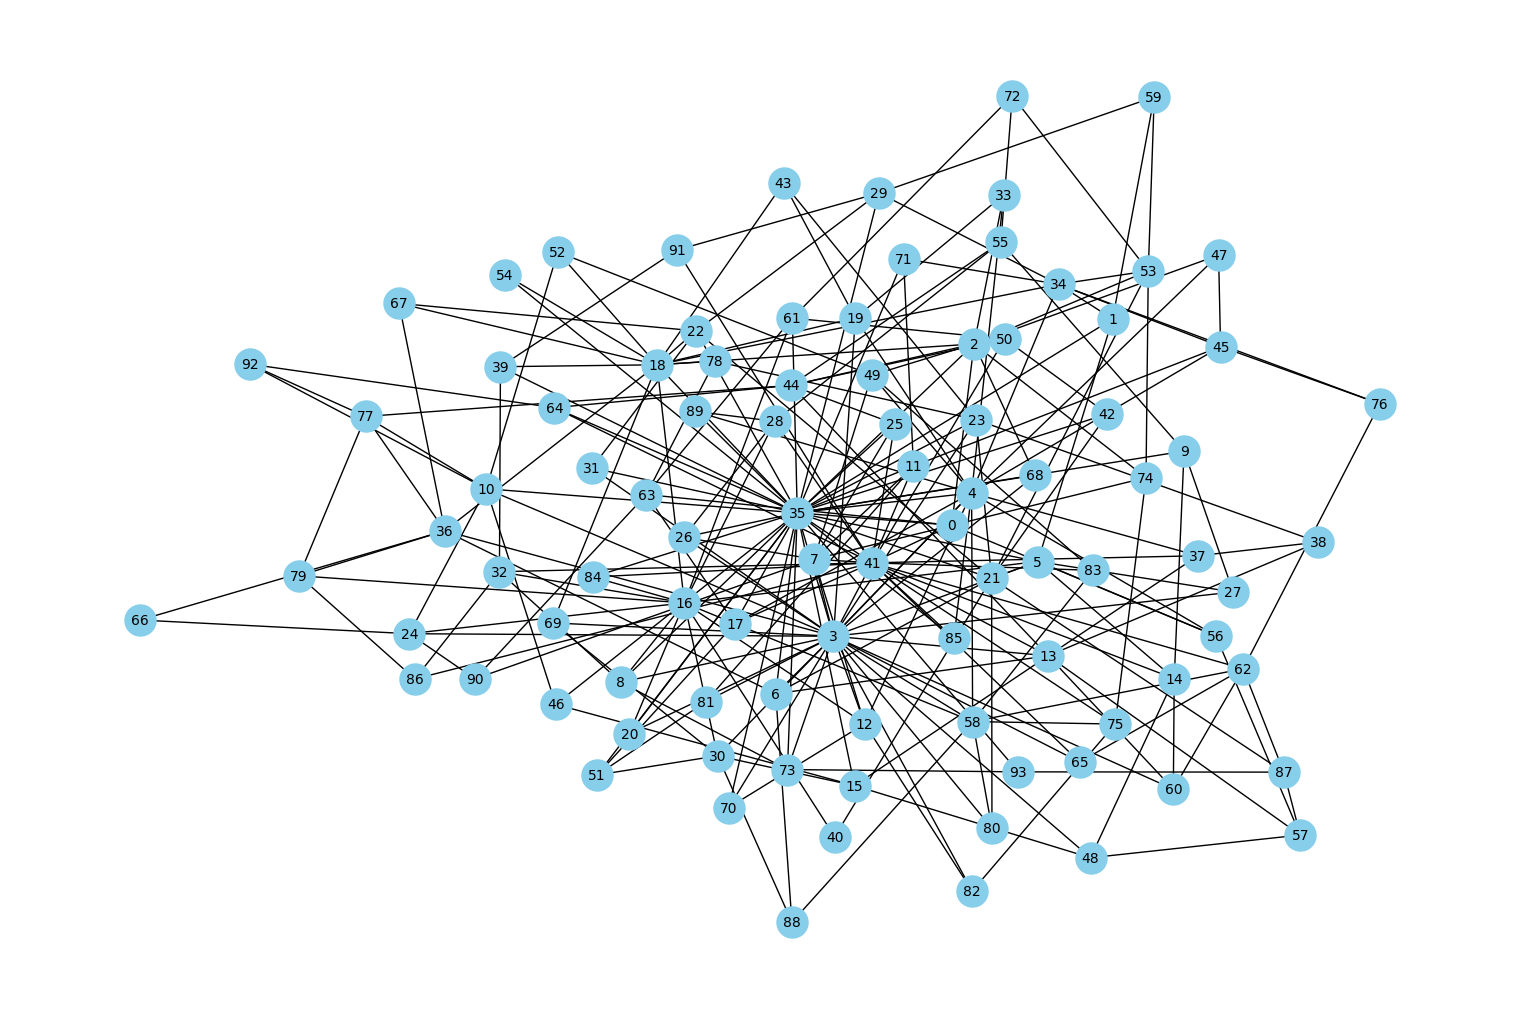

In [236]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)
PA(A, 3,94)
print(nx.degree(A, 35))
print(nx.degree(A, 41))

fig = plt.figure(figsize=(15, 10)) 
pos = nx.spring_layout(A)
nx.draw(A, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='black', linewidths=1, font_size=10)
plt.show()

In [222]:
print('Average clustering A: ' ,nx.average_clustering(A))
print('Average clustering G: ' ,nx.average_clustering(G))

Average clustering A:  0.19592822184647438
Average clustering G:  0.8002425574908809


- The average clustering is among the metric that differs the most: even if with Preferential Attachemnet we are able to reproduce the most important characteristic of the graph G (almost every node connected to the most central one), we are not able to reproduce the clustering of the graph G. This is because the Preferential Attachment algorithm tends to create networks with high clustering, but not as high as the one of the graph G. This is due to the fact that the graph G is a real network in which there are strong communities (), while the graph A is a random network.

In [223]:
print('Average shortest path lenght for A: ',nx.average_shortest_path_length(A))
print('Average shortest path lenght for G: ',nx.average_shortest_path_length(G))

Average shortest path lenght:  2.5243651338366506
Average shortest path lenght:  1.9949668268130862


- It is clear that the average shortest path is really similar between A and G. Trivially, in A almost each node is connceted to the first nodes since we implemented the PA model. However, in G this condition is also satisfied since each node is also connected to the main character (Forrest). This is the reason why the average shortest path is really similar between the two graphs. However, we can notice that the average shortest path of G is slightly higher than the one of A. This is because the main character is connected with almost every other character, a feature of the graph that cannot be reproduced with the PA model. Building a variant of the PA model that takes into account this feature could be a solution to this problem (each node creates m links and at least one of them is connected to the main character).

# e) (Optional) Provide any variant to improve the prediction.

- As said before, we are going to implement a variant in which each node creates m links and at least one of them is connected to the main character. This could be a solution to the problem of the average shortest path that is slightly higher in G than in A.

In [237]:
def variant_PA(A,m,s):
    import random
    degrees_dict = dict(A.degree())  # Dictionary containing the degree of each node
    for i in range(2,s):
        if s!=35 and s!=41:
            new_node_index = i  # Index of the new node
        if i==35: #Nodes 35 and 41 are already in the graph
            new_node_index = 0
        if i==41:
            new_node_index = 1
        A.add_node(new_node_index)  # Add the new node to the graph
        
        
        total_degree = sum(degrees_dict.values())

        A.add_edge(new_node_index, 35) # Add a link to node 35
        new_links = 1  # Number of links to be added

        
        while new_links < m: # Add m links
            for node in A.nodes(): # Iterate over all nodes
                if node == new_node_index: # Skip the new node
                    continue
                if new_links == m: # If m links have been added, stop
                    break
                probability = degrees_dict[node] / total_degree # Probability of adding a link to the current node
                random_number = random.random() # Random number between 0 and 1
                if random_number < probability: # If the random number is less than the probability, add a link
                    A.add_edge(new_node_index, node)
                    new_links += 1

            
        degrees_dict = dict(A.degree())  # Update degrees after adding the new node

    return A

93
24


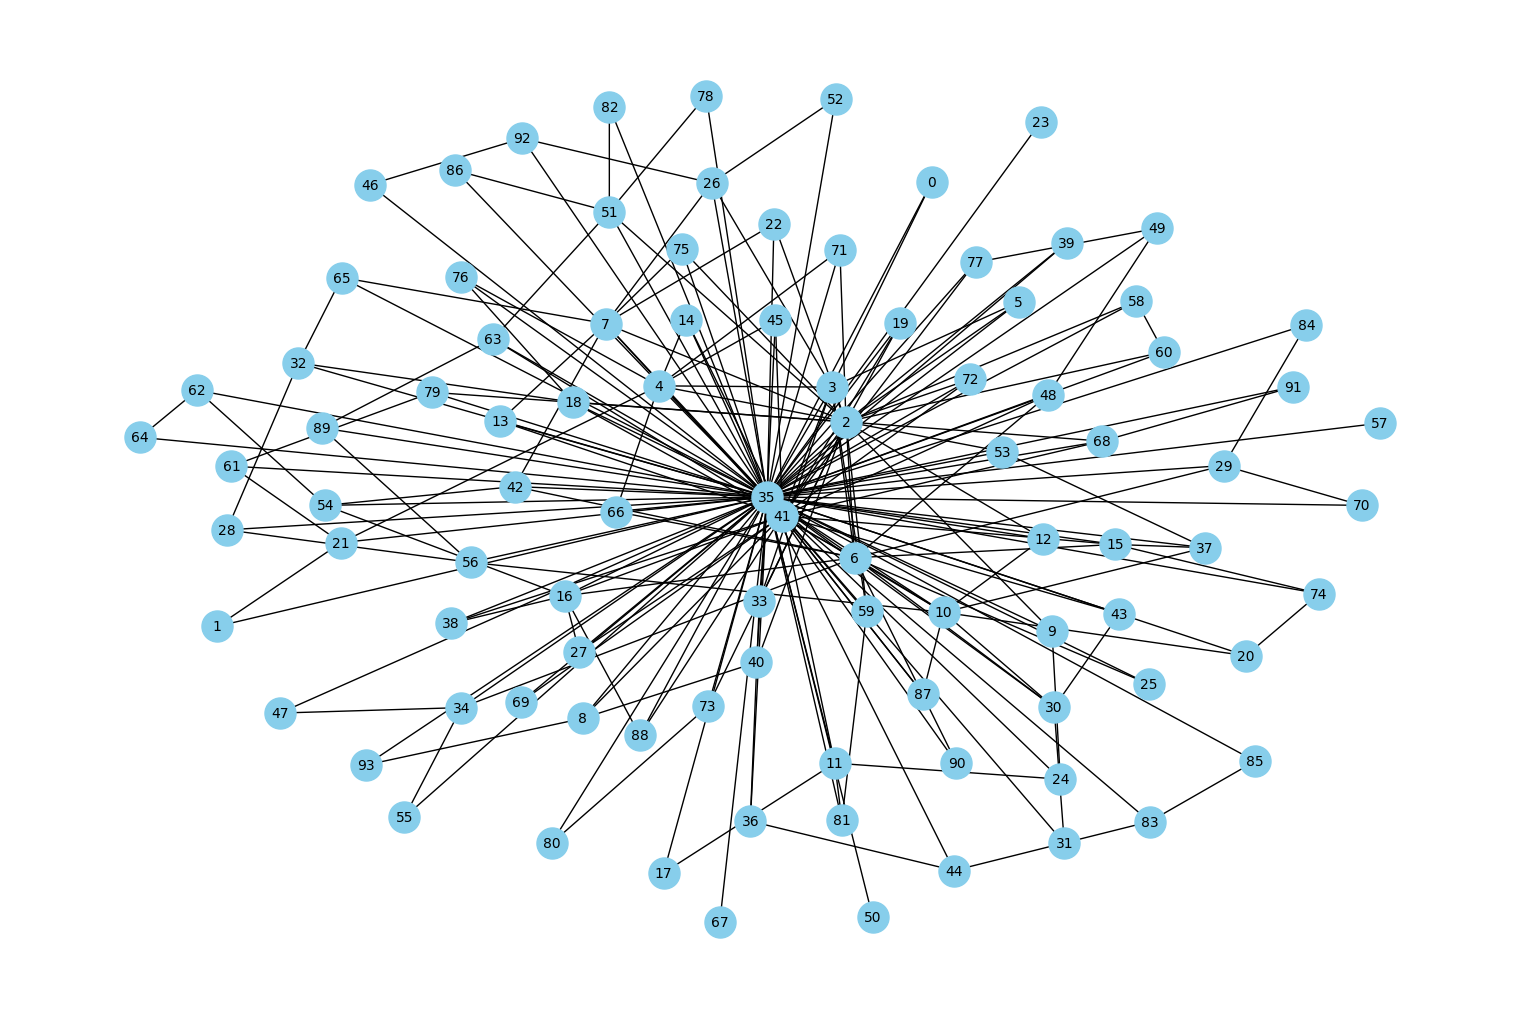

In [246]:
A = nx.Graph()
A.add_node(35)
A.add_node(41)
A.add_edge(35,41)
variant_PA(A, 3,94)
print(nx.degree(A, 35))
print(nx.degree(A, 41))

fig = plt.figure(figsize=(15, 10)) 
pos = nx.spring_layout(A)
nx.draw(A, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='black', linewidths=1, font_size=10)
plt.show()

- The prediction is now better: even by seeing the figure of the graph, it looks more similar to our graph G since we were able to reproduce the fact that almost every node is connected to the main character, and we consider it to be the most relevant feature of our graph.

# 8) Week 10 or 11

# a) Our model choice  
- We decided to implement the **Fractional Treshold Model** to simulate the outbreak and the diffusion of a disease in a network. However, having a particoular network that represents characters interactions in a movie, and being the main character Forrest connected to all the other characters, we considered a variant of the model in which the influence over a node is not linearly aggregated as the number of infected neighbors. The idea behind this choice is that, given a node $i$ and its neighbors $j$, the probability that $i$ gets infected is heavily dependent on the "weight" of their relationship. However, being the graph unweighted (and it is also not possible to try to calculate those weights), we tought that an optimal aproximation would be to consider the number of neighbors of $j$. Trivially, if $j$ has a lot of neighbors, the interaction with every single node would be less relevant.
- Assume that a node $i$ has two neighbors $j$ (infected) and $k$ (not infected). With the classical treshold model with a treshold = 0.5, $i$ would get infected even if $j$ has 20 neighbors and $k$ has 2 neighbors, and we think that this is not a realistic scenario. Instead, with our model, the influence over the node i is computed as follows:



$$ 
\Large Fractional\_Influence(i)=\frac{\sum\limits_{j \in infected\_neighbors(i)}\frac{1}{k_{out}(j)}}{\sum\limits_{j \in neighbors(i)}\frac{1}{k_{out}(j)}} 
$$

where $k_{out}(j)$ is the number of neighbors of $j$.


- In our example, the equation would be:
$$
\Bigg (\frac{\frac{1}{20}}{\frac{1}{20} + \frac{1}{2}}\Bigg) = \frac{1}{11}
$$
- The result is much less than 0.5, so the node $i$ would not get infected. Considering our assumptions, this is a more realistic scenario, since the influence of $j$ over $i$ is much less than the influence of $k$ over $i$.
- We are going to update the state of the nodes asynchronically, even if we know that the order in which the nodes are updated can affect the final result. 

In [60]:
# This is a small block to compute the normalized closeness centrality and the degree for each node in the graph
# We use the built-in function of networkx to compute the closeness centrality for each node
degree = dict(G.degree()) # dictionary containing the degree of each node
top_nodes_degree = [node for node, degree in sorted(degree.items(), key=lambda x: x[1], reverse=True)] # list of top 5 nodes
print(f"The order of nodes with the highest degree: {top_nodes_degree}")

The order of nodes with the highest degree: [35, 41, 48, 15, 85, 84, 51, 21, 32, 52, 53, 54, 55, 56, 59, 62, 82, 86, 47, 0, 6, 33, 36, 39, 40, 46, 49, 73, 88, 2, 4, 8, 12, 13, 14, 27, 58, 60, 63, 64, 65, 80, 83, 87, 89, 3, 7, 9, 19, 20, 24, 34, 45, 70, 90, 5, 17, 23, 43, 71, 10, 11, 16, 22, 25, 26, 28, 29, 30, 31, 37, 38, 42, 44, 50, 57, 67, 69, 74, 76, 77, 78, 92, 93, 1, 18, 61, 66, 68, 72, 75, 79, 81, 91]


In [61]:
def fractional_threshold_model(G, seeds, threshold=0.1):
    """
    Implements the Fractional Threshold Model on a graph G with a specified threshold.
    Each neighbor's influence on a node is inversely proportional to the neighbor's degree.
    
    :param G: A NetworkX graph
    :param threshold: The threshold for nodes to become influenced
    :return: The set of influenced nodes after the model is applied
    """
    # Initialize all nodes as uninfluenced
    # influenced = {node: False for node in G}

    # Initialize all nodes as uninfluenced, except for the seeds
    influenced = {node: (node in seeds) for node in G}


    # Function to calculate the total influence on a node
    def calculate_ratio(node):
        total_influence = 0
        denominator = 0 
        for neighbor in G.neighbors(node):
            denominator += 1 / G.degree[neighbor]
            if influenced[neighbor]:
                total_influence += 1 / G.degree[neighbor]
        return total_influence / denominator
    
    network_changed = True
    while network_changed:
        network_changed = False # Assume the network will not change in this iteration
        for node in G.nodes():
            node_influence = calculate_ratio(node)  # Call the function once and store the result
            # print(node_influence)
            if node_influence >= threshold and not influenced[node]: # If the node is not influenced and its influence is greater than the threshold, we update its status, if not, we leave it as it is.
                influenced[node] = True
                network_changed = True # The network has changed in this iteration, since the status of at least one node has changed
    
    return [node for node, inf in influenced.items() if inf]

seed_nodes = list(G.nodes())[:5]
seed_nodes.append(35)


# Applying the Fractional Threshold Model to the graph with a default threshold
influenced_nodes = fractional_threshold_model(G, seed_nodes)

# Display the number of influenced nodes
print(len(influenced_nodes), influenced_nodes[:10])  # Display first 10 influenced nodes for brevity
print(len(G.nodes()))


64 [0, 1, 2, 3, 4, 5, 10, 11, 15, 16]
94


In [62]:
# This is a small block for a function that will be used later on to simulate different scenarios of outbreaks
import random
def stochaistic_scenario(n, infected_nodes, treshold):
    """
    This function simulates a stochastic scenario of outbreaks.

    Parameters
    ----------
    - n: the number of outbreaks to simulate
    - infected_nodes: number of infected nodes
    - treshold: the treshold value for the simulation

    Returns
    -------
    A list containing the nodes that are infected in each outbreak.
    """
    total_infected_nodes = 0
    minimum_number_of_influenced_nodes = len(G.nodes())
    minimizing_sample = []
    maximum_number_of_influenced_nodes = 1
    maximizing_sample = []
    for iteration in range(n):
        seed_nodes = random.sample(list(G.nodes()), infected_nodes)
        total_infected_nodes += len(fractional_threshold_model(G, seed_nodes, treshold))
        if len(fractional_threshold_model(G, seed_nodes, treshold)) < minimum_number_of_influenced_nodes:
            minimum_number_of_influenced_nodes = len(fractional_threshold_model(G, seed_nodes, treshold))
            minimizing_sample = seed_nodes
        if len(fractional_threshold_model(G, seed_nodes, treshold)) > maximum_number_of_influenced_nodes:
            maximum_number_of_influenced_nodes = len(fractional_threshold_model(G, seed_nodes, treshold))
            maximizing_sample = seed_nodes
            infected_nodes_maximum = fractional_threshold_model(G, seed_nodes, treshold)
    return total_infected_nodes / n, minimum_number_of_influenced_nodes, minimizing_sample, maximum_number_of_influenced_nodes, maximizing_sample, infected_nodes_maximum
    

# b.1) Different Scenarios with treshold = 0.5
First of all, we consider the standard scenario in which we run the model with a treshold = 0.5.
- 1) We run the model with a treshold = 0.5 and we consider the initial infected nodes to be the fist 5 with the highest degree. 
- 2) We run the model with a treshold = 0.5 and we consider the initial infected nodes to be the fist 10 with the highest degree.
- 3) We run the model with a treshold = 0.5 and we consider the initial infected nodes to be the last 5 with the lowest degree.
- 4) We run the model with a treshold = 0.5 and we consider the initial infected nodes to be the last 10 with the lowest degree.
- 5) Stochaistic scenario: we run the model with a treshold = 0.5 and we consider the initial infected nodes to be 10 random nodes. We repeat this scenario 10 times and we compute the average number of infected nodes.

In [63]:
treshold = 0.5

seed_nodes = top_nodes_degree[:5]
print(f"First Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[:10]
print("---------------------------------------")
print(f"Second Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[::-1][:5]
print("---------------------------------------")
print(f"Third Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[::-1][:10]
print("---------------------------------------")
print(f"Fourth Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

data = stochaistic_scenario(1000, 10, 0.5)
print("---------------------------------------")
print(f"Fifth Scenario")
print(f"Avg number of infected nodes: {data[0]}")
print(f"Min number of infected nodes: {data[1]}")
print(f"Seed nodes: {data[2]}")
print(f"Max number of infected nodes: {data[3]}")
print(f"Seed nodes: {data[4]}")
print(f"Infected nodes: {data[5]}")


First Scenario
Seed nodes: [35, 41, 48, 15, 85]
Threshold: 0.5
Number of influenced nodes: 21
The influenced nodes are: [1, 10, 15, 18, 25, 28, 35, 37, 41, 42, 48, 61, 66, 68, 72, 75, 79, 81, 85, 91, 92]
---------------------------------------
Second Scenario
Seed nodes: [35, 41, 48, 15, 85, 84, 51, 21, 32, 52]
Threshold: 0.5
Number of influenced nodes: 31
The influenced nodes are: [1, 3, 10, 15, 18, 21, 25, 28, 30, 32, 35, 37, 41, 42, 48, 50, 51, 52, 61, 66, 68, 72, 75, 79, 81, 82, 84, 85, 86, 91, 92]
---------------------------------------
Third Scenario
Seed nodes: [91, 81, 79, 75, 72]
Threshold: 0.5
Number of influenced nodes: 5
The influenced nodes are: [72, 75, 79, 81, 91]
---------------------------------------
Fourth Scenario
Seed nodes: [91, 81, 79, 75, 72, 68, 66, 61, 18, 1]
Threshold: 0.5
Number of influenced nodes: 10
The influenced nodes are: [1, 18, 61, 66, 68, 72, 75, 79, 81, 91]


---------------------------------------
Fifth Scenario
Avg number of infected nodes: 14.795
Min number of infected nodes: 10
Seed nodes: [19, 82, 91, 37, 21, 90, 52, 75, 4, 61]
Max number of infected nodes: 32
Seed nodes: [70, 90, 35, 92, 51, 41, 65, 15, 16, 74]
Infected nodes: [1, 4, 7, 9, 11, 15, 16, 18, 25, 27, 28, 30, 35, 37, 41, 42, 51, 61, 65, 66, 68, 70, 71, 72, 74, 75, 79, 81, 85, 90, 91, 92]


# Considerations on the results 🔍

With a treshold = 0.5, the outbreak affects less than half of the nodes, and even running the model with different initial infected nodes many times (the aim was to find a set of nodes that would maximize the number of infected nodes), the result is always lower than 50% of the nodes. This is probably due to the fact that the graph is not really dense and the number of edges is not really high. In addittion, the only node that is connected to all the other nodes has less weight in the model, so it is more difficult to infect all the other nodes. In spite of this, nodes with higher degree are still the ones that lead to a higher number of infected nodes. 

# b.2) Different Scenarios with treshold = 0.3
Considering the previous results, we decided to decrease the treshold to 0.3 to see if we could infect more nodes.
- 1) We run the model with a treshold = 0.3 and we consider the initial infected nodes to be the fist 5 with the highest degree.
- 2) We run the model with a treshold = 0.3 and we consider the initial infected nodes to be the fist 10 with the highest degree.
- 3) We run the model with a treshold = 0.3 and we consider the initial infected nodes to be the last 5 with the lowest degree.
- 4) We run the model with a treshold = 0.3 and we consider the initial infected nodes to be the last 10 with the lowest degree.
- 5) Stochaistic scenario: we run the model with a treshold = 0.3 and we consider the initial infected nodes to be 10 random nodes. We repeat this scenario 10 times and we compute the average number of infected nodes.


In [64]:
treshold = 0.3

seed_nodes = top_nodes_degree[:5]
print(f"First Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[:10]
print("---------------------------------------")
print(f"Second Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[::-1][:5]
print("---------------------------------------")
print(f"Third Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

seed_nodes = top_nodes_degree[::-1][:10]
print("---------------------------------------")
print(f"Fourth Scenario")
print(f"Seed nodes: {seed_nodes}")
print(f"Threshold: {treshold}")
print(f"Number of influenced nodes: {len(fractional_threshold_model(G, seed_nodes, treshold))}")
print(f"The influenced nodes are: {fractional_threshold_model(G, seed_nodes, treshold)}")

data = stochaistic_scenario(1000, 10, 0.3)
print("---------------------------------------")
print(f"Fifth Scenario")
print(f"Avg number of infected nodes: {data[0]}")
print(f"Min number of infected nodes: {data[1]}")
print(f"Seed nodes: {data[2]}")
print(f"Max number of infected nodes: {data[3]}")
print(f"Seed nodes: {data[4]}")
print(f"Infected nodes: {data[5]}")




First Scenario
Seed nodes: [35, 41, 48, 15, 85]
Threshold: 0.3
Number of influenced nodes: 32
The influenced nodes are: [1, 3, 4, 10, 15, 18, 21, 25, 27, 28, 30, 35, 37, 41, 42, 48, 50, 51, 61, 65, 66, 68, 72, 75, 79, 81, 82, 84, 85, 86, 91, 92]
---------------------------------------
Second Scenario
Seed nodes: [35, 41, 48, 15, 85, 84, 51, 21, 32, 52]
Threshold: 0.3
Number of influenced nodes: 39
The influenced nodes are: [1, 3, 4, 10, 15, 18, 21, 25, 27, 28, 30, 32, 35, 37, 41, 42, 48, 50, 51, 52, 53, 54, 55, 56, 59, 61, 65, 66, 68, 72, 75, 79, 81, 82, 84, 85, 86, 91, 92]
---------------------------------------
Third Scenario
Seed nodes: [91, 81, 79, 75, 72]
Threshold: 0.3
Number of influenced nodes: 5
The influenced nodes are: [72, 75, 79, 81, 91]
---------------------------------------
Fourth Scenario
Seed nodes: [91, 81, 79, 75, 72, 68, 66, 61, 18, 1]
Threshold: 0.3
Number of influenced nodes: 10
The influenced nodes are: [1, 18, 61, 66, 68, 72, 75, 79, 81, 91]
-------------------

# Considerations on the results 🔍
- Even with a lower treshold, it was not possible to reach all the nodes in the network, even if the best result now is more than 2/3 of the total number of nodes. Not considering again the really low density of the graph, another possible reason could be the existence of many small communities (the ones that were all detected by each community detection algorithm) that are difficult to infect.
- An interesting aspect is that in the fifth scenario, the set of nodes that maximizes the number of infected nodes does not include Forrest (node 35), maybe because with a lower treshold better results are obtained by infecting nodes in different "communities".

# b.3) Different Scenarios with treshold = 0.2 (only stochastic scenario)

In [65]:
data = stochaistic_scenario(1000, 15, 0.2)
print(f"Avg number of infected nodes: {data[0]}")
print(f"Min number of infected nodes: {data[1]}")
print(f"Seed nodes: {data[2]}")
print(f"Max number of infected nodes: {data[3]}")
print(f"Seed nodes: {data[4]}")
print(f"Infected nodes: {data[5]}")
print(f"Not infected nodes: {sorted(list(G.nodes() - data[5]))}")


Avg number of infected nodes: 69.147
Min number of infected nodes: 43
Seed nodes: [22, 56, 53, 61, 89, 10, 71, 28, 73, 68, 43, 40, 29, 35, 72]
Max number of infected nodes: 89
Seed nodes: [64, 14, 83, 10, 9, 67, 70, 17, 66, 32, 11, 8, 49, 40, 31]
Infected nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
Not infected nodes: [19, 24, 29, 44, 45]


# Considerations on the results 🔍
- With a treshold = 0.1, the outbreak affects almost all the nodes, even if it is still impossible (empirically) to infect the whole network. However, we are able to identify some nodes, like 67 and 76, that are the most difficult to reach since they are only connected with each other and with Forrest (node 35).
- Again, we can observe that node 35 is not part of the set of nodes that maximizes the number of infected nodes. This is probably due to the fact that, being the main character, it is connected with all the other nodes, but in the way the model is implemented, it is more difficult to infect all the other nodes if we start from Forrest.